___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
try:
    import jupyter_black

    jupyter_black.load()
except ImportError:
    pass

In [2]:
import os

# Set TF log level to ignore INFOs.
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

In [3]:
# Check python version
!python --version

Python 3.11.4


In [4]:
# Check tensorflow version
import tensorflow as tf

tf.__version__

'2.14.0'

In [5]:
# List cuda-capable gpu's that are attached to this session
if tf.config.list_physical_devices("GPU"):
    print("GPU support is enabled for this session")
else:
    print("CPU will be used for this session")

CPU will be used for this session


In [6]:
# Get more information about the GPU
if tf.config.list_physical_devices("GPU"):
    !nvidia-smi

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation

# Uncomment the following lines if you want to suppress warnings:
# import warnings
# warnings.filterwarnings("ignore")
# warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option("display.max_columns", None)

In [8]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) `tensorflow` random seed
# 3) `python` random seed
seed = 101
keras.utils.set_random_seed(seed)
tf.random.set_seed(seed)

In [9]:
df = pd.read_csv("1-Churn_Modelling.csv")

In [10]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [11]:
df.info() # We notice there are no null valuse and we have 3 cateorical features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [12]:
df.describe().T # it seems we have to apply scaling for the data

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [13]:
df.describe(include="O").T # explore the categorical data

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


In [14]:
df.isnull().sum().any() # check null values

False

In [15]:
df.duplicated().sum().any() # check duplicates

False

In [16]:
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)
# We drop the unnecessary features, they are not useful and we think it will not affect the classification

In [17]:
df['Geography'].value_counts() 

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [18]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

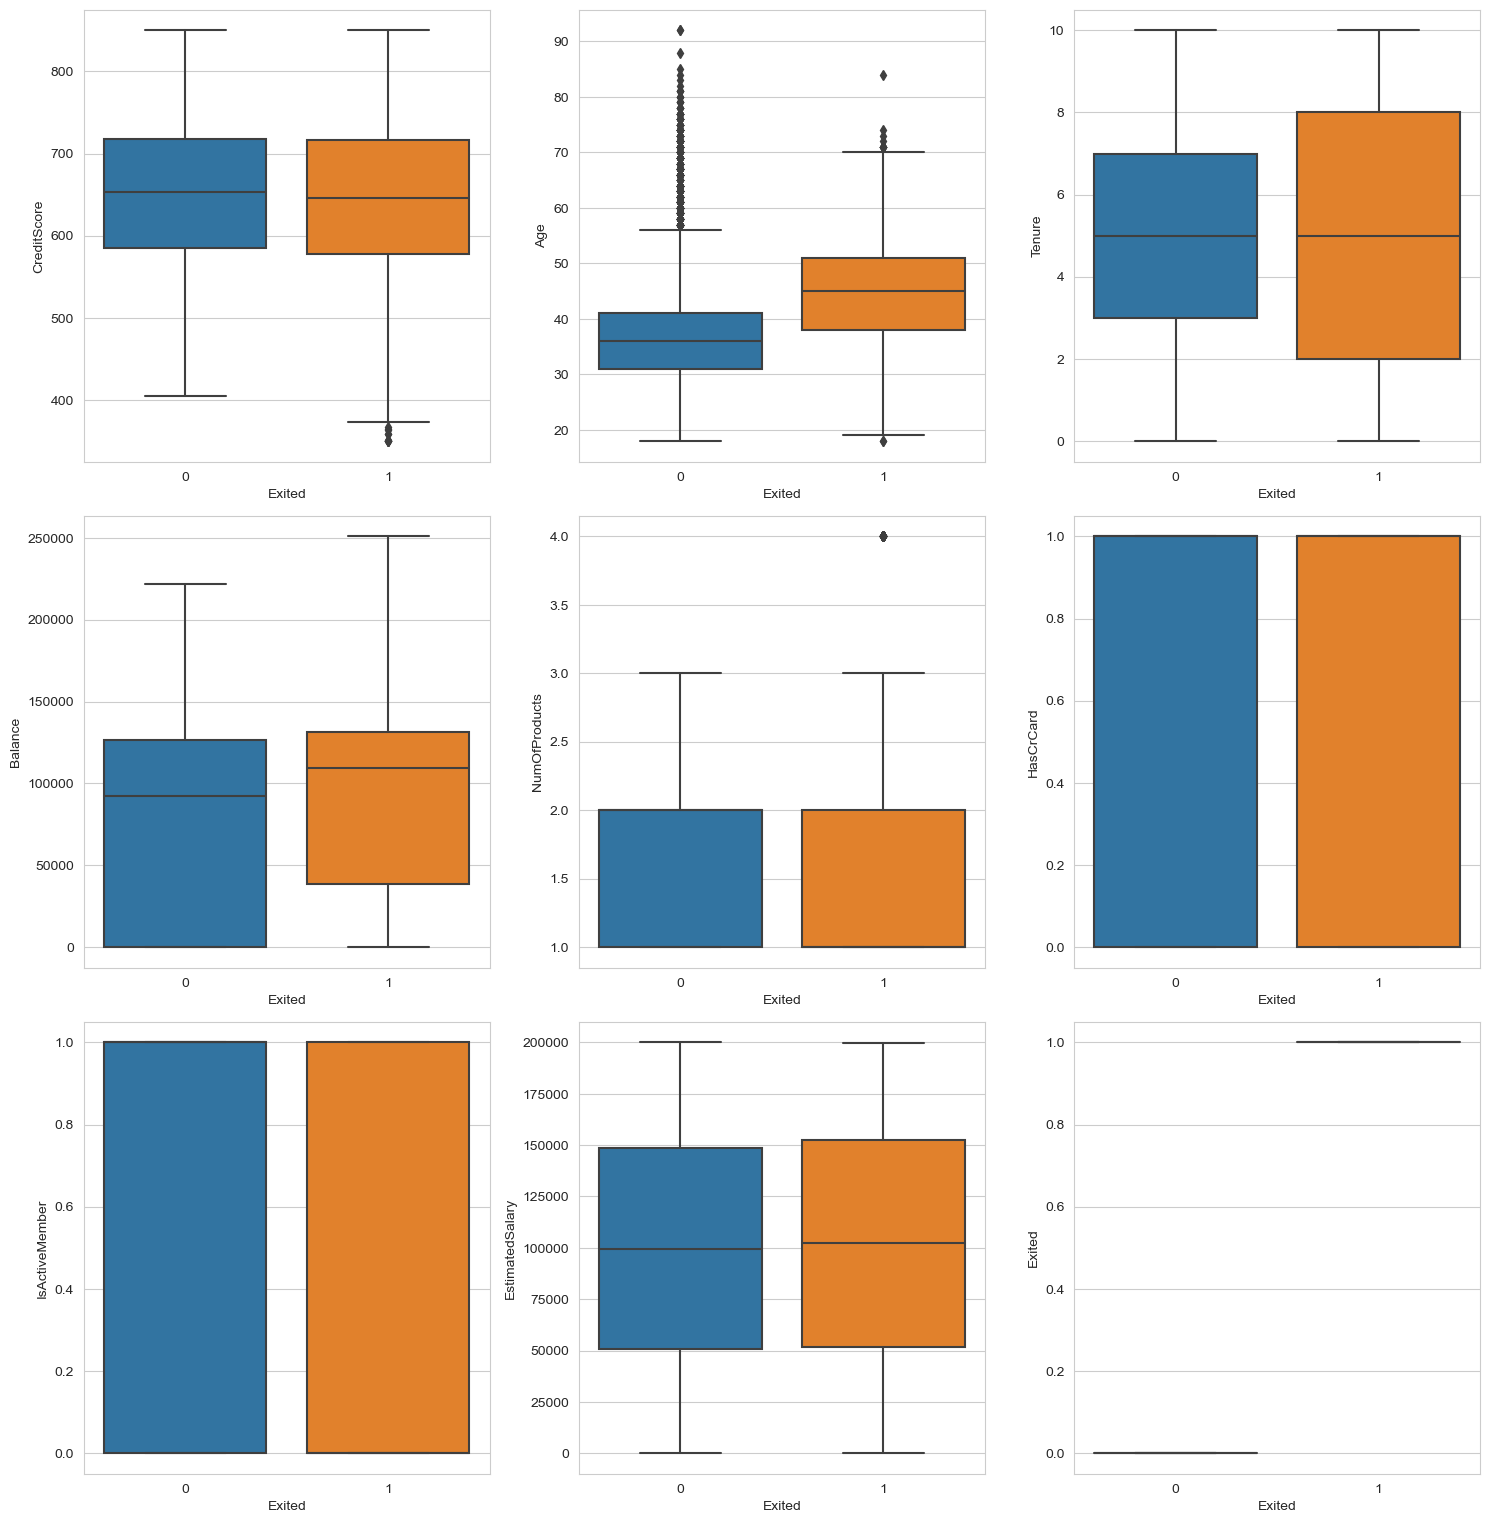

In [19]:
# This help us to see the most distinguishing features and potential outliers
# it seems there is nothing to handel

fig = plt.figure(figsize=(15,20))

for i, col in enumerate(df.select_dtypes(include=np.number)):
        plt.subplot(4,3,i+1)
        ax = sns.boxplot(x="Exited", y=df[col], data=df)

plt.tight_layout();

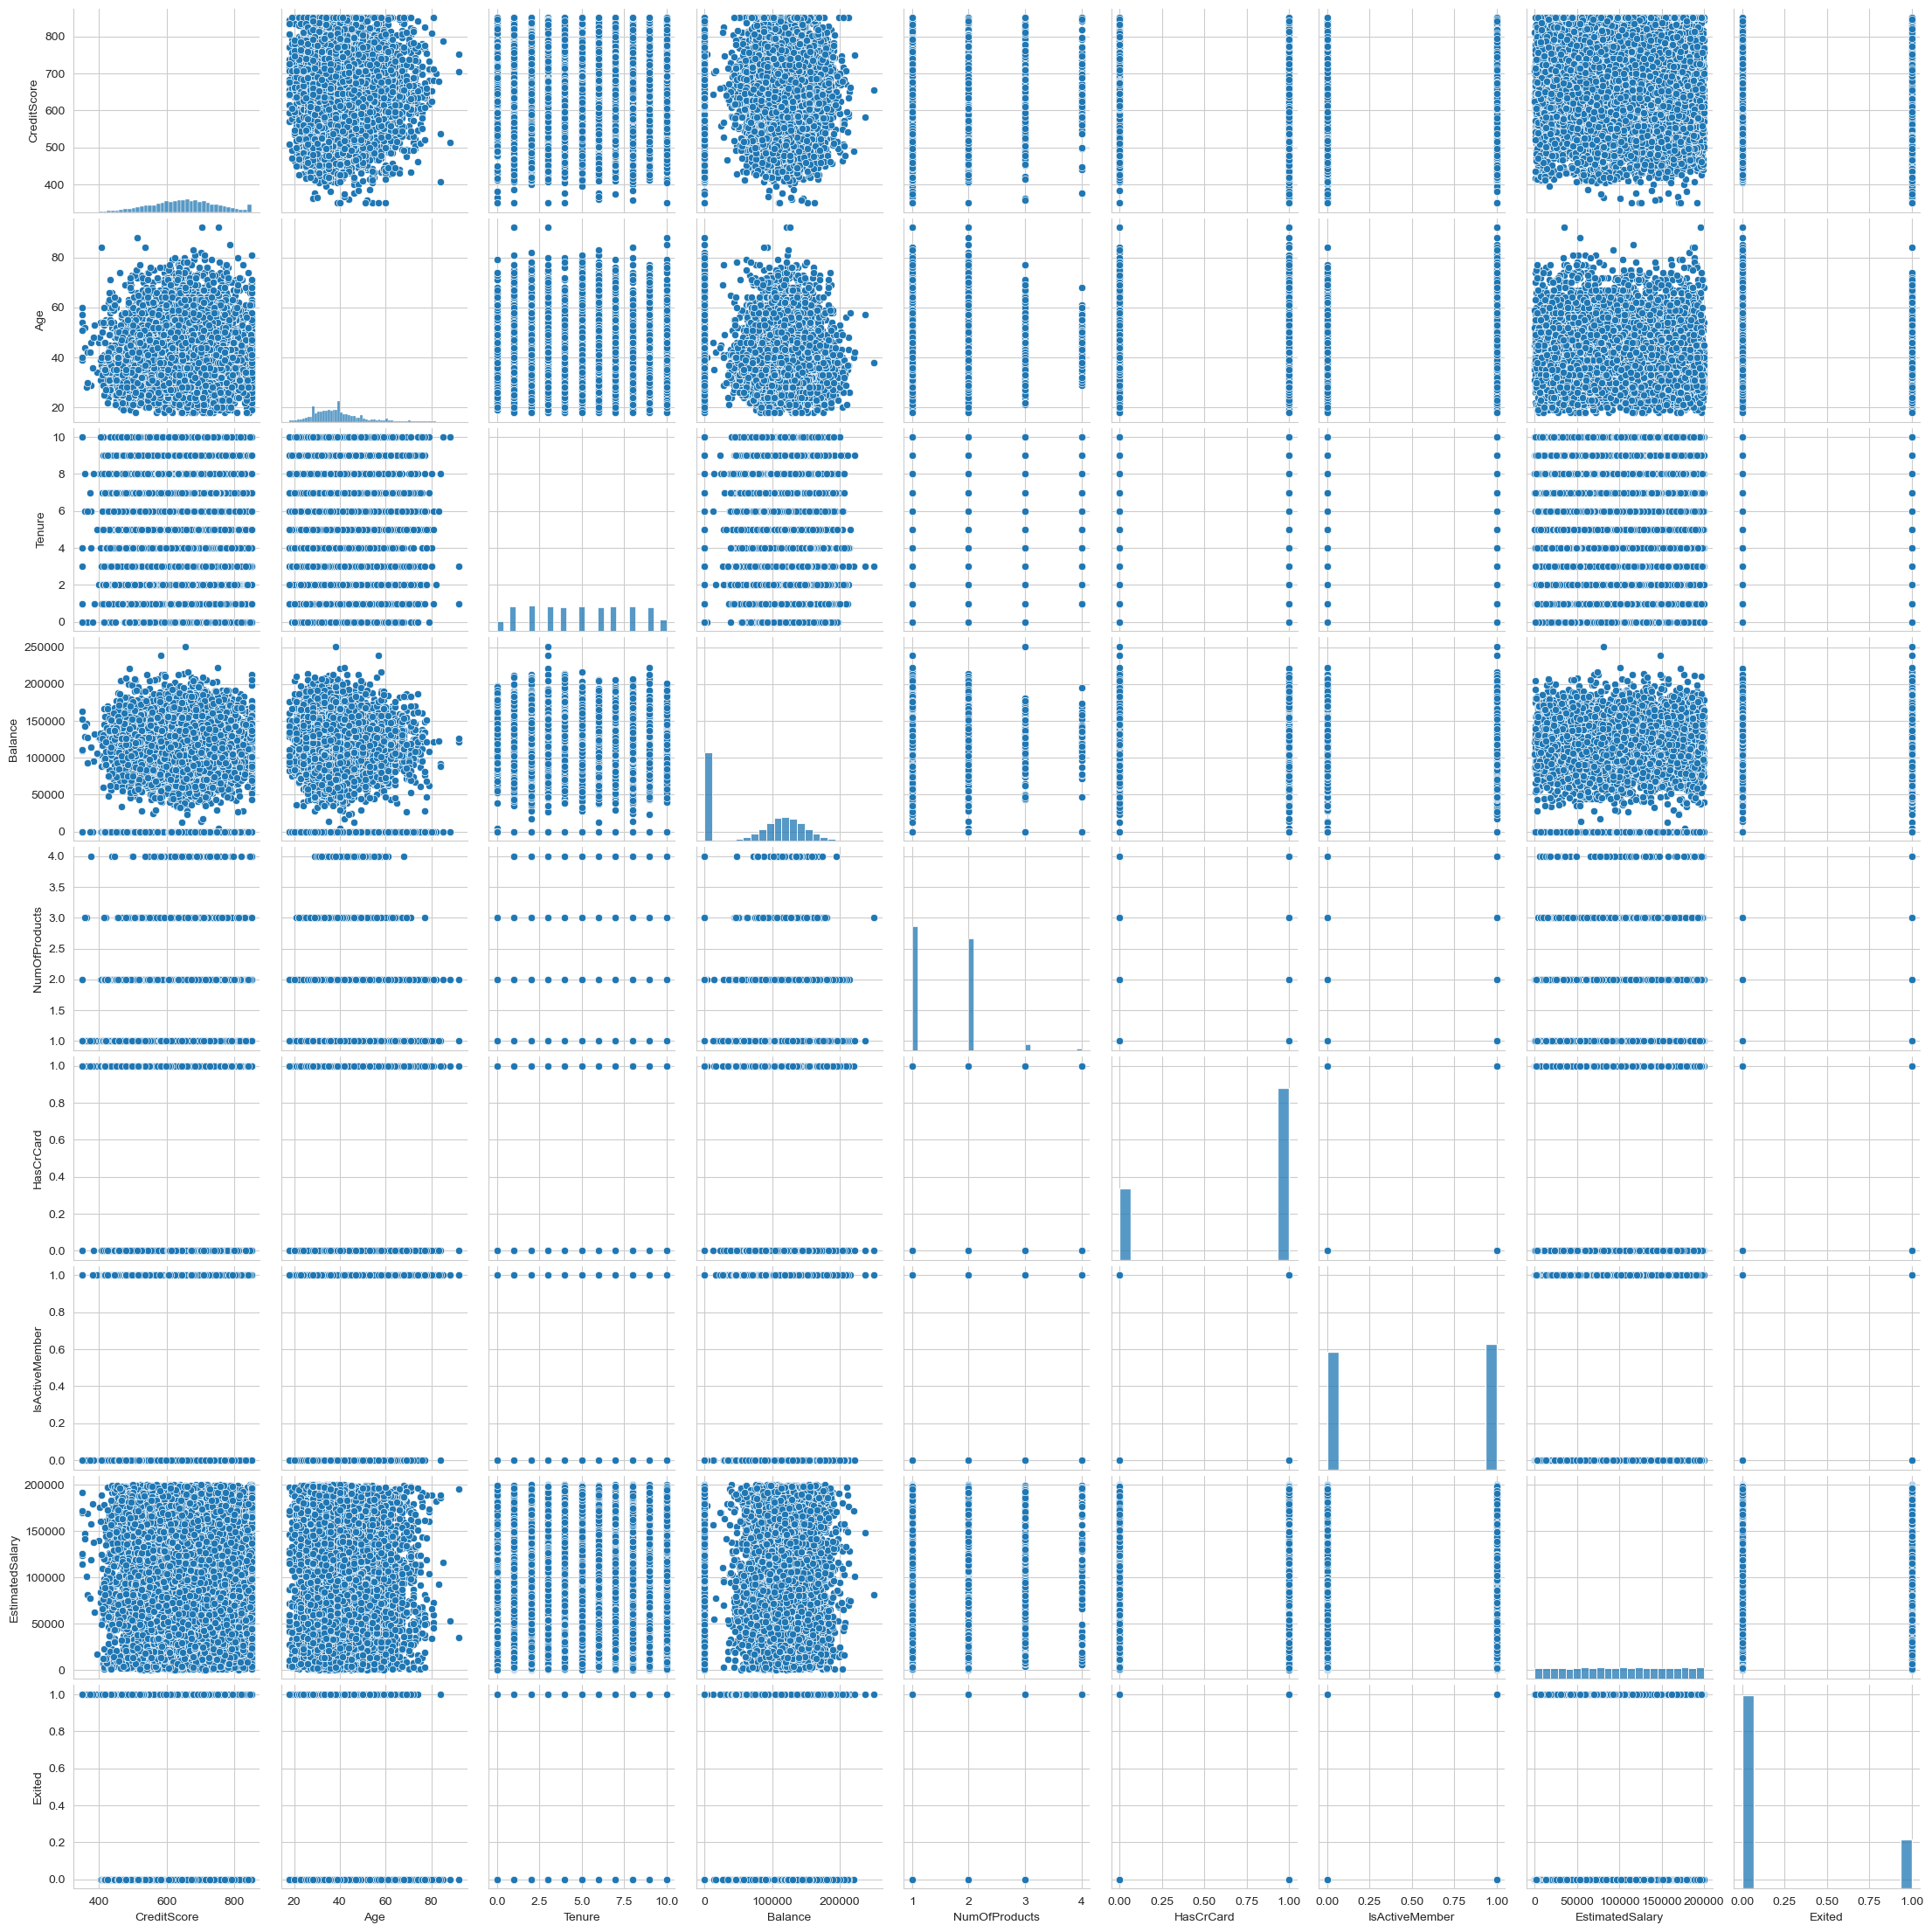

In [20]:
sns.pairplot(df)
plt.show()

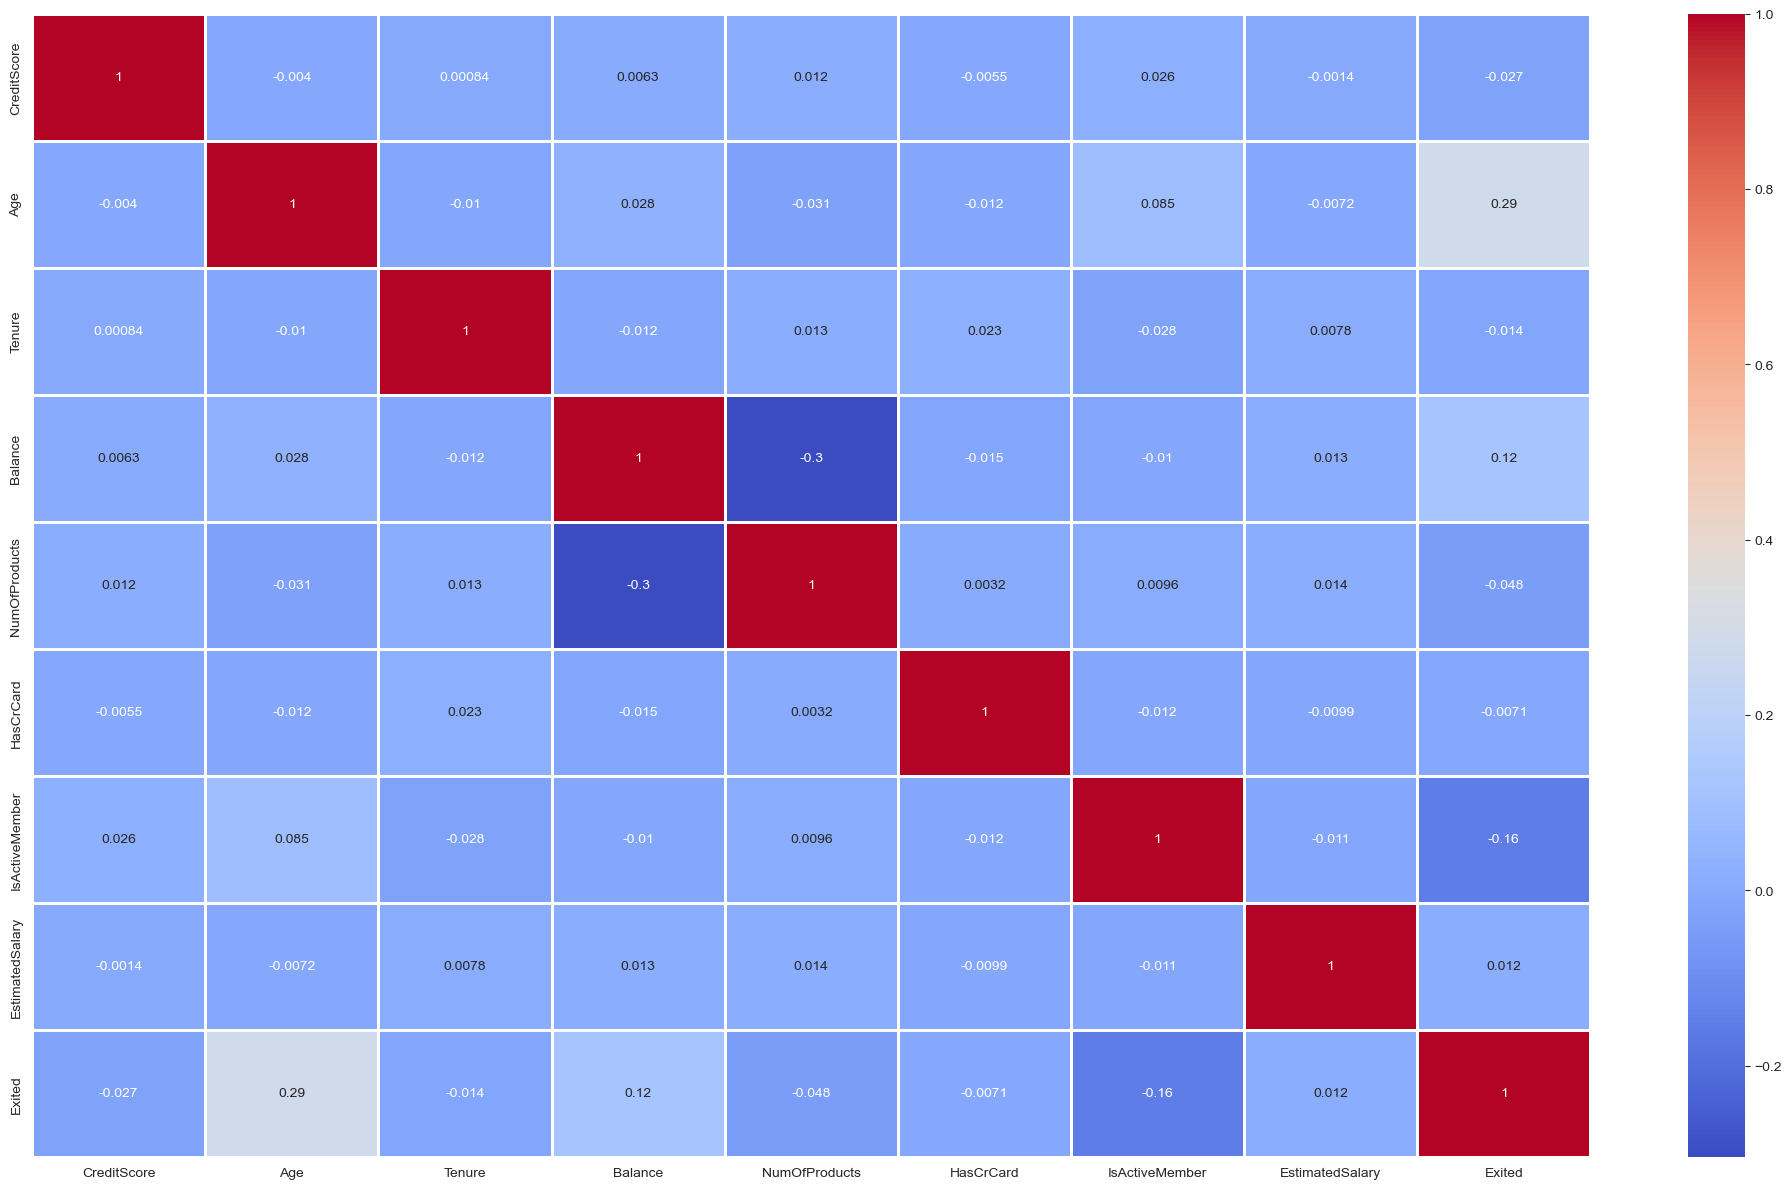

In [21]:
plt.figure(figsize=(20,12))
df_numeric = df.select_dtypes(include=['int', 'float'])
sns.heatmap(df_numeric.corr(),annot=True,linewidth =2 , cmap="coolwarm")
plt.tight_layout()
# We notice there is no correlation

# Preprocessing of Data
- Train | Test Split, Scalling

In [22]:
# import the necessary modules for preprocessing data for machine learning tasks
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer

In [23]:
# split the data to x = features and y = target
X = df.drop("Exited", axis =1)
y = df["Exited"]

In [24]:
X.shape

(10000, 10)

In [25]:
y.shape

(10000,)

In [26]:
# spilt the data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.15, random_state=seed
)

In [27]:
# spilt the train data into train and validation data
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, stratify=y_train, test_size=0.1, random_state=seed
)

In [28]:
X_train.shape

(7650, 10)

In [29]:
X_test.shape

(1500, 10)

In [30]:
X_val.shape

(850, 10)

In [31]:
y_train.shape

(7650,)

In [32]:
y_test.shape

(1500,)

In [33]:
y_val.shape

(850,)

In [34]:
# To convert the categorical features into numerical we use OneHotEncoder
categorical_columns = ['Geography', 'Gender']

column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_columns),
    remainder="passthrough",
    verbose_feature_names_out=False,
)  

column_trans = column_trans.set_output(transform="pandas")
# To scale the data we use standard scaler
scaler = StandardScaler()
operations = [('encoder',column_trans), ('scaler', scaler)]

In [35]:
pipeline = Pipeline(steps=operations) # We initiate a pipeline to apply these two steps 

In [36]:
X_train_Transformed =pipeline.fit_transform(X_train)

In [37]:
X_test_Transformed=pipeline.transform(X_test)

In [38]:
X_val_Transformed=pipeline.transform(X_val)

In [39]:
X_train_Transformed.shape # to make sure the pipeline is applied correctly

(7650, 13)

In [40]:
X_test_Transformed.shape

(1500, 13)

In [41]:
X_val_Transformed.shape

(850, 13)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [42]:
# initiate the first model (model) without class_weigth
model = Sequential()

model.add(Dense(40, activation="relu", input_dim=X_train_Transformed.shape[1]))
model.add(Dense(20, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(1, activation='sigmoid'))

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 40)                560       
                                                                 
 dense_1 (Dense)             (None, 20)                820       
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1601 (6.25 KB)
Trainable params: 1601 (6.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(13, 40) dtype=float32, numpy=
 array([[-0.30968198,  0.3343841 , -0.0759671 ,  0.13359007,  0.19299892,
         -0.02407432,  0.10409954, -0.3056168 , -0.19753954, -0.01211703,
          0.32578567,  0.14849061, -0.28850293,  0.28296855,  0.03475133,
          0.24727044, -0.03821895,  0.16769376,  0.20856544, -0.06217262,
         -0.06375206, -0.23045841, -0.08808154, -0.11090291,  0.17622694,
          0.14124691,  0.08247647,  0.18297586, -0.3021275 ,  0.03708369,
          0.20922038, -0.30731586, -0.32590887,  0.27352956, -0.09344667,
          0.02221596,  0.00524384,  0.09502506, -0.0351496 ,  0.3353854 ],
        [ 0.04650342,  0.17417595,  0.14266494, -0.08560973,  0.23772022,
          0.1299491 , -0.23043612, -0.14801732, -0.12841474,  0.1931862 ,
         -0.22568256, -0.07609302, -0.01324996, -0.24151388,  0.31788185,
         -0.03838733,  0.18657067, -0.17918156, -0.18535851, -0.05816334,
         -0.17154422, -0.02911088,  0.24214

In [45]:
model.compile(optimizer='Adam',loss='binary_crossentropy', metrics='Recall')

In [46]:
model.fit(
    x=X_train_Transformed, y=y_train, validation_data=(X_val_Transformed,y_val), batch_size=32, epochs=500, verbose=1
)

Epoch 1/500
240/240 [==============================] - 2s 3ms/step - loss: 0.4840 - recall: 0.1220 - val_loss: 0.4333 - val_recall: 0.1965
Epoch 2/500
240/240 [==============================] - 1s 2ms/step - loss: 0.4062 - recall: 0.2863 - val_loss: 0.4037 - val_recall: 0.3468
Epoch 3/500
240/240 [==============================] - 1s 2ms/step - loss: 0.3728 - recall: 0.3870 - val_loss: 0.3762 - val_recall: 0.4451
Epoch 4/500
240/240 [==============================] - 1s 2ms/step - loss: 0.3512 - recall: 0.4377 - val_loss: 0.3591 - val_recall: 0.4566
Epoch 5/500
240/240 [==============================] - 1s 2ms/step - loss: 0.3412 - recall: 0.4718 - val_loss: 0.3577 - val_recall: 0.4046
Epoch 6/500
240/240 [==============================] - 1s 2ms/step - loss: 0.3357 - recall: 0.4846 - val_loss: 0.3494 - val_recall: 0.4740
Epoch 7/500
240/240 [==============================] - 1s 2ms/step - loss: 0.3323 - recall: 0.4750 - val_loss: 0.3515 - val_recall: 0.5029
Epoch 8/500
240/240 [======

240/240 [==============================] - 1s 3ms/step - loss: 0.2726 - recall: 0.5828 - val_loss: 0.3603 - val_recall: 0.5318
Epoch 60/500
240/240 [==============================] - 1s 3ms/step - loss: 0.2697 - recall: 0.5976 - val_loss: 0.3598 - val_recall: 0.5318
Epoch 61/500
240/240 [==============================] - 1s 3ms/step - loss: 0.2682 - recall: 0.5995 - val_loss: 0.3661 - val_recall: 0.5087
Epoch 62/500
240/240 [==============================] - 1s 3ms/step - loss: 0.2695 - recall: 0.6065 - val_loss: 0.3548 - val_recall: 0.5260
Epoch 63/500
240/240 [==============================] - 1s 3ms/step - loss: 0.2689 - recall: 0.5969 - val_loss: 0.3615 - val_recall: 0.5029
Epoch 64/500
240/240 [==============================] - 1s 3ms/step - loss: 0.2688 - recall: 0.5969 - val_loss: 0.3608 - val_recall: 0.5780
Epoch 65/500
240/240 [==============================] - 1s 3ms/step - loss: 0.2672 - recall: 0.6078 - val_loss: 0.3704 - val_recall: 0.4798
Epoch 66/500
240/240 [===========

240/240 [==============================] - 1s 2ms/step - loss: 0.2385 - recall: 0.6508 - val_loss: 0.3960 - val_recall: 0.4740
Epoch 118/500
240/240 [==============================] - 1s 2ms/step - loss: 0.2371 - recall: 0.6553 - val_loss: 0.4054 - val_recall: 0.5202
Epoch 119/500
240/240 [==============================] - 1s 2ms/step - loss: 0.2384 - recall: 0.6496 - val_loss: 0.4058 - val_recall: 0.5029
Epoch 120/500
240/240 [==============================] - 1s 2ms/step - loss: 0.2376 - recall: 0.6528 - val_loss: 0.3993 - val_recall: 0.5145
Epoch 121/500
240/240 [==============================] - 1s 2ms/step - loss: 0.2371 - recall: 0.6528 - val_loss: 0.4050 - val_recall: 0.5434
Epoch 122/500
240/240 [==============================] - 1s 2ms/step - loss: 0.2385 - recall: 0.6560 - val_loss: 0.4106 - val_recall: 0.5087
Epoch 123/500
240/240 [==============================] - 1s 2ms/step - loss: 0.2348 - recall: 0.6547 - val_loss: 0.4099 - val_recall: 0.4855
Epoch 124/500
240/240 [====

240/240 [==============================] - 1s 2ms/step - loss: 0.2160 - recall: 0.6874 - val_loss: 0.4546 - val_recall: 0.4913
Epoch 176/500
240/240 [==============================] - 1s 2ms/step - loss: 0.2182 - recall: 0.6816 - val_loss: 0.4638 - val_recall: 0.5087
Epoch 177/500
240/240 [==============================] - 1s 3ms/step - loss: 0.2155 - recall: 0.6913 - val_loss: 0.4553 - val_recall: 0.5029
Epoch 178/500
240/240 [==============================] - 1s 2ms/step - loss: 0.2156 - recall: 0.6874 - val_loss: 0.4502 - val_recall: 0.4798
Epoch 179/500
240/240 [==============================] - 1s 2ms/step - loss: 0.2140 - recall: 0.6881 - val_loss: 0.4479 - val_recall: 0.4740
Epoch 180/500
240/240 [==============================] - 1s 2ms/step - loss: 0.2142 - recall: 0.6887 - val_loss: 0.4484 - val_recall: 0.5202
Epoch 181/500
240/240 [==============================] - 1s 3ms/step - loss: 0.2141 - recall: 0.6932 - val_loss: 0.4574 - val_recall: 0.5491
Epoch 182/500
240/240 [====

240/240 [==============================] - 1s 2ms/step - loss: 0.2007 - recall: 0.7099 - val_loss: 0.5084 - val_recall: 0.5318
Epoch 234/500
240/240 [==============================] - 1s 2ms/step - loss: 0.1987 - recall: 0.7137 - val_loss: 0.5077 - val_recall: 0.4855
Epoch 235/500
240/240 [==============================] - 1s 2ms/step - loss: 0.2001 - recall: 0.7157 - val_loss: 0.5014 - val_recall: 0.5549
Epoch 236/500
240/240 [==============================] - 1s 3ms/step - loss: 0.2044 - recall: 0.7092 - val_loss: 0.4983 - val_recall: 0.4971
Epoch 237/500
240/240 [==============================] - 1s 2ms/step - loss: 0.2022 - recall: 0.7073 - val_loss: 0.5132 - val_recall: 0.4682
Epoch 238/500
240/240 [==============================] - 1s 2ms/step - loss: 0.1973 - recall: 0.7189 - val_loss: 0.5195 - val_recall: 0.4277
Epoch 239/500
240/240 [==============================] - 1s 2ms/step - loss: 0.1963 - recall: 0.7112 - val_loss: 0.5248 - val_recall: 0.4624
Epoch 240/500
240/240 [====

240/240 [==============================] - 1s 2ms/step - loss: 0.1874 - recall: 0.7349 - val_loss: 0.5597 - val_recall: 0.5780
Epoch 292/500
240/240 [==============================] - 1s 2ms/step - loss: 0.1902 - recall: 0.7291 - val_loss: 0.5565 - val_recall: 0.5087
Epoch 293/500
240/240 [==============================] - 1s 3ms/step - loss: 0.1883 - recall: 0.7439 - val_loss: 0.5457 - val_recall: 0.4855
Epoch 294/500
240/240 [==============================] - 1s 2ms/step - loss: 0.1883 - recall: 0.7317 - val_loss: 0.5450 - val_recall: 0.4682
Epoch 295/500
240/240 [==============================] - 1s 2ms/step - loss: 0.1916 - recall: 0.7234 - val_loss: 0.5587 - val_recall: 0.5723
Epoch 296/500
240/240 [==============================] - 1s 2ms/step - loss: 0.1930 - recall: 0.7336 - val_loss: 0.5491 - val_recall: 0.4393
Epoch 297/500
240/240 [==============================] - 1s 2ms/step - loss: 0.1872 - recall: 0.7298 - val_loss: 0.5428 - val_recall: 0.4566
Epoch 298/500
240/240 [====

240/240 [==============================] - 1s 2ms/step - loss: 0.1809 - recall: 0.7516 - val_loss: 0.5812 - val_recall: 0.5491
Epoch 350/500
240/240 [==============================] - 1s 2ms/step - loss: 0.1771 - recall: 0.7503 - val_loss: 0.5981 - val_recall: 0.4971
Epoch 351/500
240/240 [==============================] - 1s 2ms/step - loss: 0.1772 - recall: 0.7516 - val_loss: 0.5865 - val_recall: 0.5491
Epoch 352/500
240/240 [==============================] - 1s 2ms/step - loss: 0.1759 - recall: 0.7522 - val_loss: 0.5817 - val_recall: 0.5202
Epoch 353/500
240/240 [==============================] - 1s 2ms/step - loss: 0.1775 - recall: 0.7516 - val_loss: 0.5850 - val_recall: 0.5549
Epoch 354/500
240/240 [==============================] - 1s 2ms/step - loss: 0.1829 - recall: 0.7484 - val_loss: 0.5753 - val_recall: 0.5202
Epoch 355/500
240/240 [==============================] - 1s 2ms/step - loss: 0.1794 - recall: 0.7478 - val_loss: 0.5727 - val_recall: 0.4798
Epoch 356/500
240/240 [====

240/240 [==============================] - 1s 2ms/step - loss: 0.1627 - recall: 0.7689 - val_loss: 0.6255 - val_recall: 0.5145
Epoch 408/500
240/240 [==============================] - 1s 2ms/step - loss: 0.1646 - recall: 0.7689 - val_loss: 0.6454 - val_recall: 0.5202
Epoch 409/500
240/240 [==============================] - 1s 2ms/step - loss: 0.1669 - recall: 0.7689 - val_loss: 0.6315 - val_recall: 0.5318
Epoch 410/500
240/240 [==============================] - 1s 2ms/step - loss: 0.1629 - recall: 0.7728 - val_loss: 0.6316 - val_recall: 0.5434
Epoch 411/500
240/240 [==============================] - 1s 2ms/step - loss: 0.1649 - recall: 0.7734 - val_loss: 0.6427 - val_recall: 0.5145
Epoch 412/500
240/240 [==============================] - 1s 2ms/step - loss: 0.1648 - recall: 0.7721 - val_loss: 0.6694 - val_recall: 0.5838
Epoch 413/500
240/240 [==============================] - 1s 2ms/step - loss: 0.1678 - recall: 0.7644 - val_loss: 0.6253 - val_recall: 0.5029
Epoch 414/500
240/240 [====

240/240 [==============================] - 1s 3ms/step - loss: 0.1625 - recall: 0.7824 - val_loss: 0.6850 - val_recall: 0.5029
Epoch 466/500
240/240 [==============================] - 1s 3ms/step - loss: 0.1563 - recall: 0.7869 - val_loss: 0.6811 - val_recall: 0.5434
Epoch 467/500
240/240 [==============================] - 1s 3ms/step - loss: 0.1587 - recall: 0.7824 - val_loss: 0.6884 - val_recall: 0.5029
Epoch 468/500
240/240 [==============================] - 1s 2ms/step - loss: 0.1574 - recall: 0.7908 - val_loss: 0.6978 - val_recall: 0.5491
Epoch 469/500
240/240 [==============================] - 1s 3ms/step - loss: 0.1572 - recall: 0.7786 - val_loss: 0.6914 - val_recall: 0.5376
Epoch 470/500
240/240 [==============================] - 1s 3ms/step - loss: 0.1567 - recall: 0.7824 - val_loss: 0.6881 - val_recall: 0.5376
Epoch 471/500
240/240 [==============================] - 1s 2ms/step - loss: 0.1597 - recall: 0.7786 - val_loss: 0.7036 - val_recall: 0.4971
Epoch 472/500
240/240 [====

In [47]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(13, 40) dtype=float32, numpy=
 array([[-3.59762073e-01,  5.89622915e-01,  4.01532883e-03,
          4.18535471e-01,  5.64715981e-01,  1.03181198e-01,
          1.05645165e-01, -7.37741888e-01, -3.68199557e-01,
         -2.20650822e-01,  4.89522249e-01,  5.48728049e-01,
         -3.51690888e-01,  5.59764862e-01,  1.02823153e-01,
          2.94848830e-01, -2.27547824e-01,  2.71835685e-01,
          6.41946137e-01, -1.05751812e-01,  5.73282726e-02,
         -3.47864866e-01, -2.26198167e-01, -3.08527112e-01,
          2.69067049e-01,  3.48970503e-01, -4.18564230e-01,
          3.60722005e-01, -2.61561960e-01, -4.18385155e-02,
          1.32219136e-01, -2.99804688e-01, -3.43429923e-01,
          5.96548140e-01,  7.02716038e-02,  1.45021781e-01,
          1.25071704e-01,  4.24299240e-02,  1.56849381e-02,
          6.32240236e-01],
        [ 1.79977372e-01,  2.61238307e-01,  2.04425920e-02,
         -3.90313983e-01,  6.35938346e-02,  8.49312395e-02,
     

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [48]:
# import the necessary functions that are useful for evaluating the performance of classification models.
from sklearn.metrics import confusion_matrix,classification_report,RocCurveDisplay,roc_auc_score

In [49]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.484,0.122,0.433,0.197
1,0.406,0.286,0.404,0.347
2,0.373,0.387,0.376,0.445
3,0.351,0.438,0.359,0.457
4,0.341,0.472,0.358,0.405


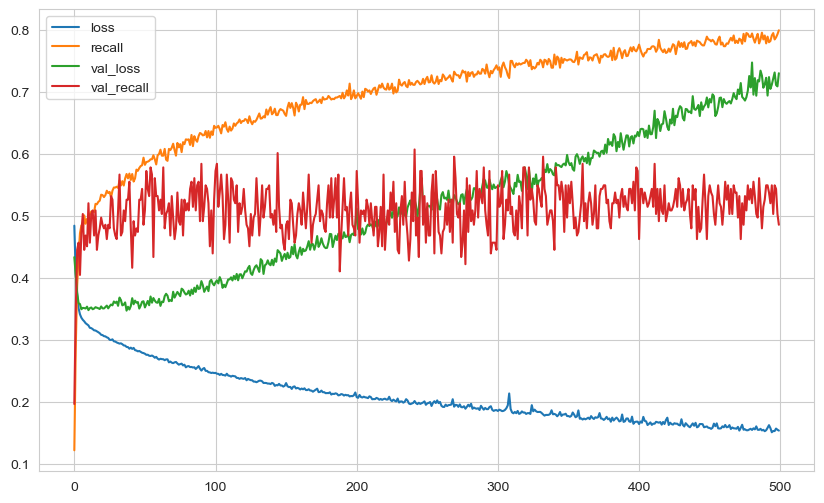

In [50]:
loss_df.plot()
plt.show()
# shows that the model is overfitting the training data and not generalizing well to new data.
# as the training loss is decreasing and the validation loss is increasing.
# there is a huge gap between training recall and validation recall which indicates overfitting.

In [52]:
loss, Recall = model.evaluate(X_test_Transformed, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", Recall)
# We notice that the training recall is high, but the validation and testing recall are both low.
# This indicates that the model is overfitting the training data and is not able to generalize to new data.

loss:  0.9752570986747742
recall:  0.4084967374801636


In [53]:
y_pred =(model.predict(X_test_Transformed) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

47/47 [==============================] - 0s 2ms/step
[[1066  128]
 [ 181  125]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1194
           1       0.49      0.41      0.45       306

    accuracy                           0.79      1500
   macro avg       0.67      0.65      0.66      1500
weighted avg       0.78      0.79      0.79      1500



In [54]:
my_dict = {
    "Actual": y_test,
    "Pred": y_pred.reshape(
        -1,
    ),
}
compare = pd.DataFrame(my_dict)
compare.sample(10)

,Actual,Pred
495,0,0
5681,0,0
2599,0,0
467,1,1
3649,0,0
3564,1,0
8549,0,0
9625,1,0
8393,1,1
9259,0,0


47/47 [==============================] - 0s 2ms/step


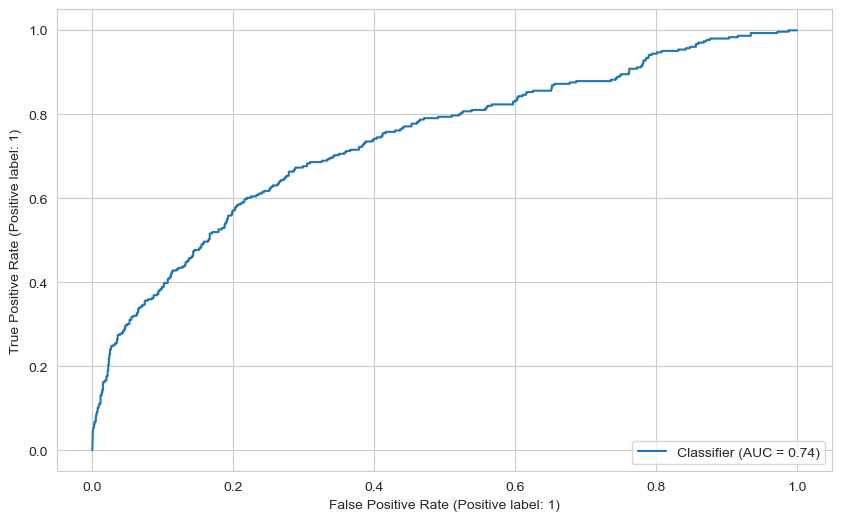

In [55]:
y_pred_proba = model.predict(X_test_Transformed)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [56]:
roc_auc_score(y_test, y_pred_proba)

0.7381925969717871

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [57]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

(-1.25, 1.25, -1.25, 1.25)

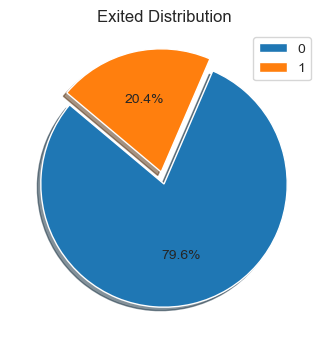

In [58]:
# to show the distribution of the data in terms of gender
plt.figure(figsize=(4, 4))

explode = [0, 0.1]
plt.pie(df['Exited'].value_counts(),
        explode=explode,
        autopct='%1.1f%%',
        shadow=True,
        startangle=140)
plt.legend(labels=['0', '1'])
plt.title('Exited Distribution')
plt.axis('off')

In [59]:
# import compute_class_weight function which is useful for computing class weights for imbalanced datasets.
from sklearn.utils.class_weight import compute_class_weight

###### I tried assigning weights using the inverse of the class frequency but the results was bad ######

# # To assign weights to binary classes using the inverse of the class frequency:
# # First, we compute the class frequency
# class_frequency = compute_class_weight('balanced', classes=[0, 1], y=y_train)
# # Second, we calculate the inverse of the class frequency for each class
# class_weights_array = 1.0 / class_frequency
# # Lets see the result
# class_weights_array

In [60]:
# To give more weight to the minority class
class_weights_array = compute_class_weight(class_weight='balanced', classes=[0, 1], y=y_train)
class_weights_array

array([0.62787262, 2.4550706 ])

In [61]:
# To convert the class_weights_array to dictionary
class_weights = {}

# Iterate over the array and add each element to the dictionary
for i in range(len(class_weights_array)):
  class_weights[i] = class_weights_array[i]

# Return the dictionary
class_weights

{0: 0.6278726198292843, 1: 2.4550706033376124}

In [62]:
# initiate the second model (model2) with class_weigth
model2 = Sequential()

model2.add(Dense(40, activation="relu", input_dim=X_train_Transformed.shape[1]))
model2.add(Dense(20, activation="relu"))
model2.add(Dense(10, activation="relu"))
model2.add(Dense(1, activation='sigmoid'))

In [63]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 40)                560       
                                                                 
 dense_5 (Dense)             (None, 20)                820       
                                                                 
 dense_6 (Dense)             (None, 10)                210       
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1601 (6.25 KB)
Trainable params: 1601 (6.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [64]:
model2.weights

[<tf.Variable 'dense_4/kernel:0' shape=(13, 40) dtype=float32, numpy=
 array([[ 0.18691048, -0.15286046,  0.11420384, -0.32494062,  0.06830248,
          0.17651019,  0.2797325 , -0.00346842,  0.07540667, -0.30292746,
         -0.19281873, -0.24917722,  0.3350781 , -0.27816832, -0.32285294,
         -0.00707492, -0.02500525, -0.15712324, -0.2951102 , -0.28773853,
         -0.294151  , -0.32246763,  0.11212963, -0.21811974,  0.25988135,
         -0.13794468,  0.00701436,  0.02129576, -0.08452439, -0.14092506,
         -0.2098782 , -0.23642391,  0.06054568, -0.05397004, -0.33618405,
         -0.14077081, -0.10611656, -0.29596525,  0.20813921, -0.3196594 ],
        [-0.3183783 ,  0.16930202,  0.06449488, -0.08073291,  0.10847282,
          0.19839522, -0.29728422,  0.30019405, -0.10873851,  0.30095592,
          0.27321687, -0.2912969 , -0.01661426,  0.02042064,  0.31198373,
          0.11898899, -0.27590358, -0.12195686, -0.12594624,  0.04276046,
         -0.0478138 ,  0.03095862, -0.102

In [65]:
model2.compile(optimizer='Adam',loss='binary_crossentropy', metrics='Recall')

In [66]:
model2.fit(
    x=X_train_Transformed, y=y_train, validation_data=(X_val_Transformed,y_val),
    batch_size=32, epochs=500, verbose=1, class_weight=class_weights
)

Epoch 1/500
240/240 [==============================] - 3s 4ms/step - loss: 0.6189 - recall: 0.6386 - val_loss: 0.5576 - val_recall: 0.7110
Epoch 2/500
240/240 [==============================] - 1s 3ms/step - loss: 0.5287 - recall: 0.7272 - val_loss: 0.5269 - val_recall: 0.7399
Epoch 3/500
240/240 [==============================] - 1s 3ms/step - loss: 0.4853 - recall: 0.7522 - val_loss: 0.5246 - val_recall: 0.7746
Epoch 4/500
240/240 [==============================] - 1s 3ms/step - loss: 0.4672 - recall: 0.7619 - val_loss: 0.4730 - val_recall: 0.7572
Epoch 5/500
240/240 [==============================] - 1s 3ms/step - loss: 0.4561 - recall: 0.7638 - val_loss: 0.4463 - val_recall: 0.7341
Epoch 6/500
240/240 [==============================] - 1s 3ms/step - loss: 0.4498 - recall: 0.7683 - val_loss: 0.4798 - val_recall: 0.7746
Epoch 7/500
240/240 [==============================] - 1s 3ms/step - loss: 0.4432 - recall: 0.7664 - val_loss: 0.4923 - val_recall: 0.7861
Epoch 8/500
240/240 [======

240/240 [==============================] - 1s 3ms/step - loss: 0.3636 - recall: 0.8203 - val_loss: 0.4555 - val_recall: 0.7168
Epoch 60/500
240/240 [==============================] - 1s 3ms/step - loss: 0.3614 - recall: 0.8306 - val_loss: 0.4637 - val_recall: 0.7168
Epoch 61/500
240/240 [==============================] - 1s 2ms/step - loss: 0.3611 - recall: 0.8344 - val_loss: 0.4601 - val_recall: 0.7110
Epoch 62/500
240/240 [==============================] - 1s 2ms/step - loss: 0.3585 - recall: 0.8306 - val_loss: 0.4667 - val_recall: 0.7572
Epoch 63/500
240/240 [==============================] - 1s 3ms/step - loss: 0.3588 - recall: 0.8293 - val_loss: 0.4310 - val_recall: 0.6705
Epoch 64/500
240/240 [==============================] - 1s 2ms/step - loss: 0.3609 - recall: 0.8280 - val_loss: 0.4962 - val_recall: 0.7861
Epoch 65/500
240/240 [==============================] - 1s 3ms/step - loss: 0.3565 - recall: 0.8325 - val_loss: 0.4221 - val_recall: 0.6763
Epoch 66/500
240/240 [===========

240/240 [==============================] - 1s 3ms/step - loss: 0.3126 - recall: 0.8684 - val_loss: 0.4929 - val_recall: 0.7225
Epoch 118/500
240/240 [==============================] - 1s 2ms/step - loss: 0.3103 - recall: 0.8748 - val_loss: 0.4896 - val_recall: 0.6879
Epoch 119/500
240/240 [==============================] - 1s 3ms/step - loss: 0.3092 - recall: 0.8716 - val_loss: 0.4753 - val_recall: 0.6647
Epoch 120/500
240/240 [==============================] - 1s 3ms/step - loss: 0.3095 - recall: 0.8684 - val_loss: 0.4948 - val_recall: 0.6879
Epoch 121/500
240/240 [==============================] - 1s 2ms/step - loss: 0.3106 - recall: 0.8671 - val_loss: 0.5482 - val_recall: 0.7225
Epoch 122/500
240/240 [==============================] - 1s 3ms/step - loss: 0.3166 - recall: 0.8626 - val_loss: 0.4782 - val_recall: 0.6879
Epoch 123/500
240/240 [==============================] - 1s 2ms/step - loss: 0.3066 - recall: 0.8729 - val_loss: 0.4691 - val_recall: 0.6416
Epoch 124/500
240/240 [====

240/240 [==============================] - 1s 3ms/step - loss: 0.2771 - recall: 0.8883 - val_loss: 0.5413 - val_recall: 0.6647
Epoch 176/500
240/240 [==============================] - 1s 2ms/step - loss: 0.2828 - recall: 0.8838 - val_loss: 0.5480 - val_recall: 0.6647
Epoch 177/500
240/240 [==============================] - 1s 2ms/step - loss: 0.2817 - recall: 0.8870 - val_loss: 0.5151 - val_recall: 0.6474
Epoch 178/500
240/240 [==============================] - 1s 3ms/step - loss: 0.2774 - recall: 0.8947 - val_loss: 0.5124 - val_recall: 0.6069
Epoch 179/500
240/240 [==============================] - 1s 2ms/step - loss: 0.2779 - recall: 0.8941 - val_loss: 0.5708 - val_recall: 0.6590
Epoch 180/500
240/240 [==============================] - 1s 2ms/step - loss: 0.2767 - recall: 0.8954 - val_loss: 0.5194 - val_recall: 0.6358
Epoch 181/500
240/240 [==============================] - 1s 2ms/step - loss: 0.2764 - recall: 0.8922 - val_loss: 0.5447 - val_recall: 0.6705
Epoch 182/500
240/240 [====

240/240 [==============================] - 1s 3ms/step - loss: 0.2576 - recall: 0.9031 - val_loss: 0.5754 - val_recall: 0.6590
Epoch 234/500
240/240 [==============================] - 1s 3ms/step - loss: 0.2567 - recall: 0.9037 - val_loss: 0.5673 - val_recall: 0.5838
Epoch 235/500
240/240 [==============================] - 1s 2ms/step - loss: 0.2523 - recall: 0.8979 - val_loss: 0.6366 - val_recall: 0.6821
Epoch 236/500
240/240 [==============================] - 1s 3ms/step - loss: 0.2715 - recall: 0.8979 - val_loss: 0.5970 - val_recall: 0.6243
Epoch 237/500
240/240 [==============================] - 1s 3ms/step - loss: 0.2543 - recall: 0.9089 - val_loss: 0.5709 - val_recall: 0.5954
Epoch 238/500
240/240 [==============================] - 1s 3ms/step - loss: 0.2571 - recall: 0.8967 - val_loss: 0.5724 - val_recall: 0.5780
Epoch 239/500
240/240 [==============================] - 1s 3ms/step - loss: 0.2530 - recall: 0.8967 - val_loss: 0.5803 - val_recall: 0.6301
Epoch 240/500
240/240 [====

240/240 [==============================] - 1s 2ms/step - loss: 0.2399 - recall: 0.9140 - val_loss: 0.6457 - val_recall: 0.6416
Epoch 292/500
240/240 [==============================] - 1s 3ms/step - loss: 0.2400 - recall: 0.9082 - val_loss: 0.6338 - val_recall: 0.6532
Epoch 293/500
240/240 [==============================] - 1s 3ms/step - loss: 0.2371 - recall: 0.9217 - val_loss: 0.6362 - val_recall: 0.6069
Epoch 294/500
240/240 [==============================] - 1s 3ms/step - loss: 0.2382 - recall: 0.9166 - val_loss: 0.6057 - val_recall: 0.6243
Epoch 295/500
240/240 [==============================] - 1s 3ms/step - loss: 0.2449 - recall: 0.9178 - val_loss: 0.6209 - val_recall: 0.6301
Epoch 296/500
240/240 [==============================] - 1s 3ms/step - loss: 0.2435 - recall: 0.9063 - val_loss: 0.6033 - val_recall: 0.5838
Epoch 297/500
240/240 [==============================] - 1s 3ms/step - loss: 0.2353 - recall: 0.9146 - val_loss: 0.6408 - val_recall: 0.6416
Epoch 298/500
240/240 [====

240/240 [==============================] - 1s 2ms/step - loss: 0.2293 - recall: 0.9243 - val_loss: 0.6351 - val_recall: 0.6185
Epoch 350/500
240/240 [==============================] - 1s 3ms/step - loss: 0.2257 - recall: 0.9262 - val_loss: 0.6788 - val_recall: 0.6358
Epoch 351/500
240/240 [==============================] - 1s 2ms/step - loss: 0.2262 - recall: 0.9217 - val_loss: 0.7328 - val_recall: 0.6994
Epoch 352/500
240/240 [==============================] - 1s 2ms/step - loss: 0.2301 - recall: 0.9178 - val_loss: 0.6547 - val_recall: 0.6185
Epoch 353/500
240/240 [==============================] - 1s 2ms/step - loss: 0.2271 - recall: 0.9198 - val_loss: 0.7006 - val_recall: 0.6416
Epoch 354/500
240/240 [==============================] - 1s 3ms/step - loss: 0.2450 - recall: 0.9191 - val_loss: 0.6350 - val_recall: 0.6185
Epoch 355/500
240/240 [==============================] - 1s 3ms/step - loss: 0.2272 - recall: 0.9236 - val_loss: 0.6278 - val_recall: 0.6069
Epoch 356/500
240/240 [====

240/240 [==============================] - 1s 2ms/step - loss: 0.2196 - recall: 0.9223 - val_loss: 0.6470 - val_recall: 0.6185
Epoch 408/500
240/240 [==============================] - 1s 2ms/step - loss: 0.2177 - recall: 0.9249 - val_loss: 0.7217 - val_recall: 0.6474
Epoch 409/500
240/240 [==============================] - 1s 2ms/step - loss: 0.2213 - recall: 0.9313 - val_loss: 0.6764 - val_recall: 0.6474
Epoch 410/500
240/240 [==============================] - 1s 2ms/step - loss: 0.2157 - recall: 0.9275 - val_loss: 0.6695 - val_recall: 0.6243
Epoch 411/500
240/240 [==============================] - 1s 2ms/step - loss: 0.2183 - recall: 0.9262 - val_loss: 0.6885 - val_recall: 0.6243
Epoch 412/500
240/240 [==============================] - 1s 2ms/step - loss: 0.2211 - recall: 0.9255 - val_loss: 0.6612 - val_recall: 0.6012
Epoch 413/500
240/240 [==============================] - 1s 3ms/step - loss: 0.2222 - recall: 0.9262 - val_loss: 0.6474 - val_recall: 0.5954
Epoch 414/500
240/240 [====

240/240 [==============================] - 1s 3ms/step - loss: 0.2114 - recall: 0.9332 - val_loss: 0.6805 - val_recall: 0.5954
Epoch 466/500
240/240 [==============================] - 1s 2ms/step - loss: 0.2120 - recall: 0.9358 - val_loss: 0.7063 - val_recall: 0.6301
Epoch 467/500
240/240 [==============================] - 1s 3ms/step - loss: 0.2062 - recall: 0.9313 - val_loss: 0.7558 - val_recall: 0.6474
Epoch 468/500
240/240 [==============================] - 1s 2ms/step - loss: 0.2203 - recall: 0.9268 - val_loss: 0.7043 - val_recall: 0.6358
Epoch 469/500
240/240 [==============================] - 1s 2ms/step - loss: 0.2096 - recall: 0.9320 - val_loss: 0.7525 - val_recall: 0.6185
Epoch 470/500
240/240 [==============================] - 1s 2ms/step - loss: 0.2077 - recall: 0.9365 - val_loss: 0.7253 - val_recall: 0.6301
Epoch 471/500
240/240 [==============================] - 1s 2ms/step - loss: 0.2105 - recall: 0.9352 - val_loss: 0.7021 - val_recall: 0.6127
Epoch 472/500
240/240 [====

In [67]:
model2.weights

[<tf.Variable 'dense_4/kernel:0' shape=(13, 40) dtype=float32, numpy=
 array([[ 5.86527467e-01,  1.05203480e-01,  2.71945655e-01,
         -4.07712668e-01,  1.31067872e-01,  3.58494967e-01,
          5.34451783e-01, -2.21094534e-01,  2.79303581e-01,
         -7.49506891e-01, -5.15875340e-01, -2.51380205e-01,
          6.32490039e-01, -3.93491834e-01, -4.43170220e-01,
          1.24245316e-01, -3.81311983e-01,  7.39721507e-02,
         -3.10763925e-01, -6.73401833e-01, -1.84247449e-01,
         -6.48673892e-01, -3.88463587e-02, -1.15932085e-01,
          3.85202289e-01, -4.13319379e-01,  5.78070462e-01,
          2.90974915e-01, -1.34085625e-04, -2.25447878e-01,
         -4.55343217e-01, -3.80638242e-01,  1.70612380e-01,
          1.03082031e-01, -4.23505187e-01, -1.21919490e-01,
         -1.33342266e-01, -4.48773950e-01,  8.42425376e-02,
         -7.32023939e-02],
        [-8.60840619e-01,  2.66633272e-01,  2.22467169e-01,
         -2.07496732e-01,  2.35991940e-01,  4.38026711e-02,
   

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [68]:
loss_df2 = pd.DataFrame(model2.history.history)
loss_df2.head()

,loss,recall,val_loss,val_recall
0,0.619,0.639,0.558,0.711
1,0.529,0.727,0.527,0.740
2,0.485,0.752,0.525,0.775
3,0.467,0.762,0.473,0.757
4,0.456,0.764,0.446,0.734


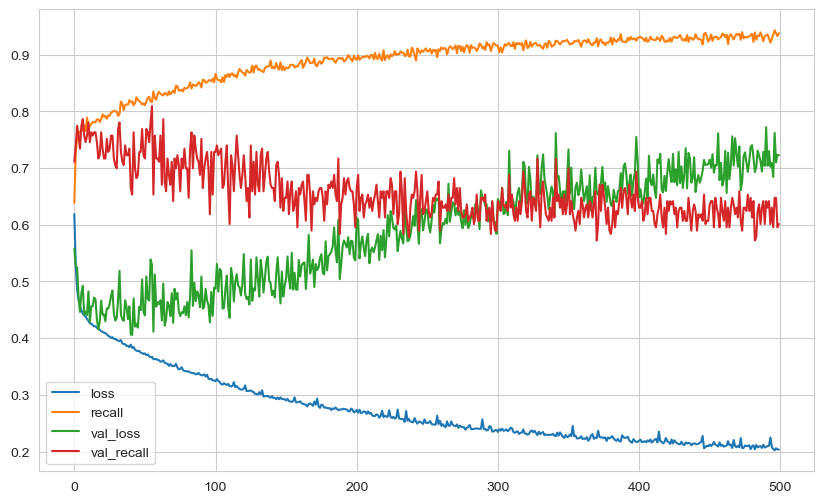

In [69]:
loss_df2.plot()
plt.show()

# shows that the model is overfitting the training data and not generalizing well to new data.
# as the training loss is decreasing and the validation loss is increasing.
# there is a huge gap between training recall and validation recall which indicates overfitting.

In [71]:
loss, Recall = model2.evaluate(X_test_Transformed, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", Recall)

loss:  0.8117169737815857
recall:  0.5588235259056091


In [72]:
y_pred2 =(model2.predict(X_test_Transformed) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

47/47 [==============================] - 0s 2ms/step
[[998 196]
 [135 171]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1194
           1       0.47      0.56      0.51       306

    accuracy                           0.78      1500
   macro avg       0.67      0.70      0.68      1500
weighted avg       0.80      0.78      0.79      1500



In [73]:
my_dict = {
    "Actual": y_test,
    "Pred": y_pred2.reshape(
        -1,
    ),
}
compare = pd.DataFrame(my_dict)
compare.sample(10)

,Actual,Pred
5733,1,0
5461,0,0
1607,0,0
7915,1,1
8008,0,1
2471,0,0
7329,0,0
3741,1,0
8654,0,0
290,0,0


47/47 [==============================] - 0s 2ms/step


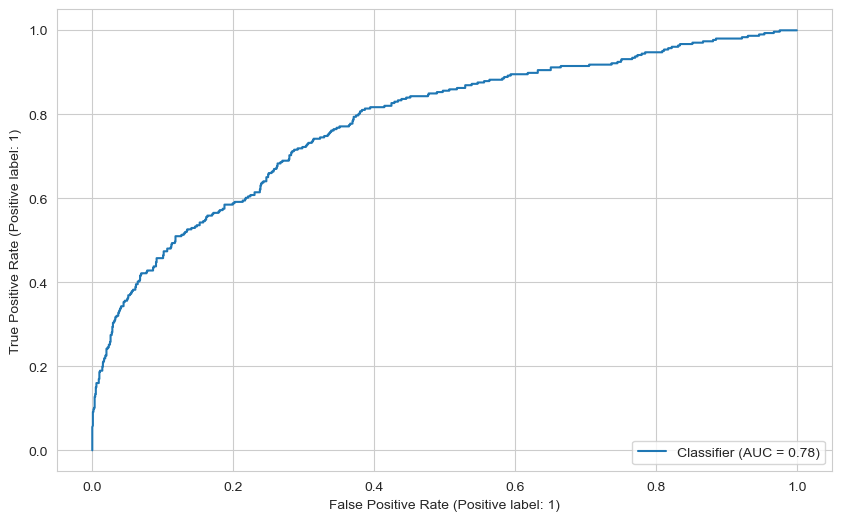

In [74]:
y_pred_proba2 = model2.predict(X_test_Transformed)
RocCurveDisplay.from_predictions(y_test, y_pred_proba2)

In [75]:
roc_auc_score(y_test, y_pred_proba2)

0.7796731478744485

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method

### Increase The Learning Rate and Observe The Results

In [76]:
# import Adam class from which is useful for optimizing the loss function.
from tensorflow.keras.optimizers import Adam

In [77]:
# initiate the third model (model3) with class_weigth + incresing the learning rate
model3 = Sequential()

model3.add(Dense(40, activation="relu", input_dim=X_train_Transformed.shape[1]))
model3.add(Dense(20, activation="relu"))
model3.add(Dense(10, activation="relu"))
model3.add(Dense(1, activation='sigmoid'))

In [78]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 40)                560       
                                                                 
 dense_9 (Dense)             (None, 20)                820       
                                                                 
 dense_10 (Dense)            (None, 10)                210       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1601 (6.25 KB)
Trainable params: 1601 (6.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [79]:
model3.weights

[<tf.Variable 'dense_8/kernel:0' shape=(13, 40) dtype=float32, numpy=
 array([[-2.56037951e-01,  2.94781119e-01, -2.90968806e-01,
          3.08048278e-01,  1.75659448e-01,  2.26375312e-01,
          4.73696291e-02, -5.52960038e-02,  2.42408484e-01,
          2.10903078e-01,  2.02814639e-02,  2.82973915e-01,
         -2.91750222e-01,  1.34820312e-01,  1.01396143e-02,
          2.66075939e-01,  1.80875093e-01, -2.66881347e-01,
         -6.30716980e-02,  1.61318928e-01, -3.91032100e-02,
          2.80097336e-01,  2.84620434e-01, -4.71733212e-02,
         -2.02735737e-01, -3.01886052e-01, -8.30956101e-02,
         -2.77837008e-01,  1.01962477e-01,  2.00173527e-01,
         -4.34952080e-02,  2.51271337e-01,  2.81737447e-02,
          2.58279830e-01, -2.68897176e-01,  6.80643022e-02,
          3.86984944e-02,  2.90545523e-02, -2.87024975e-01,
          1.60654008e-01],
        [-3.00621659e-01,  4.02452052e-02, -1.63729191e-01,
          2.89191157e-01, -1.03597432e-01,  2.15947628e-04,
   

In [80]:
opt = Adam(learning_rate=0.003)
model3.compile(optimizer=opt ,loss='binary_crossentropy', metrics='Recall')

In [81]:
model3.fit(
    x=X_train_Transformed, y=y_train, validation_data=(X_val_Transformed,y_val),
    batch_size=32, epochs=500, verbose=1, class_weight=class_weights
)

Epoch 1/500
240/240 [==============================] - 2s 3ms/step - loss: 0.5465 - recall: 0.7118 - val_loss: 0.5119 - val_recall: 0.7688
Epoch 2/500
240/240 [==============================] - 1s 2ms/step - loss: 0.4714 - recall: 0.7574 - val_loss: 0.4829 - val_recall: 0.7746
Epoch 3/500
240/240 [==============================] - 1s 2ms/step - loss: 0.4590 - recall: 0.7490 - val_loss: 0.5194 - val_recall: 0.7919
Epoch 4/500
240/240 [==============================] - 1s 2ms/step - loss: 0.4557 - recall: 0.7619 - val_loss: 0.4448 - val_recall: 0.7399
Epoch 5/500
240/240 [==============================] - 1s 3ms/step - loss: 0.4488 - recall: 0.7709 - val_loss: 0.4262 - val_recall: 0.7052
Epoch 6/500
240/240 [==============================] - 1s 3ms/step - loss: 0.4462 - recall: 0.7689 - val_loss: 0.4722 - val_recall: 0.7977
Epoch 7/500
240/240 [==============================] - 1s 3ms/step - loss: 0.4405 - recall: 0.7786 - val_loss: 0.5076 - val_recall: 0.7977
Epoch 8/500
240/240 [======

240/240 [==============================] - 1s 2ms/step - loss: 0.3248 - recall: 0.8569 - val_loss: 0.4722 - val_recall: 0.7341
Epoch 60/500
240/240 [==============================] - 1s 2ms/step - loss: 0.3250 - recall: 0.8607 - val_loss: 0.4871 - val_recall: 0.7168
Epoch 61/500
240/240 [==============================] - 1s 2ms/step - loss: 0.3220 - recall: 0.8569 - val_loss: 0.5108 - val_recall: 0.7457
Epoch 62/500
240/240 [==============================] - 1s 2ms/step - loss: 0.3243 - recall: 0.8594 - val_loss: 0.4985 - val_recall: 0.7225
Epoch 63/500
240/240 [==============================] - 1s 2ms/step - loss: 0.3262 - recall: 0.8562 - val_loss: 0.4932 - val_recall: 0.6705
Epoch 64/500
240/240 [==============================] - 1s 2ms/step - loss: 0.3297 - recall: 0.8671 - val_loss: 0.5170 - val_recall: 0.7572
Epoch 65/500
240/240 [==============================] - 1s 2ms/step - loss: 0.3171 - recall: 0.8594 - val_loss: 0.4800 - val_recall: 0.6994
Epoch 66/500
240/240 [===========

240/240 [==============================] - 1s 2ms/step - loss: 0.2567 - recall: 0.9076 - val_loss: 0.6367 - val_recall: 0.6821
Epoch 118/500
240/240 [==============================] - 1s 3ms/step - loss: 0.2573 - recall: 0.9082 - val_loss: 0.6461 - val_recall: 0.6763
Epoch 119/500
240/240 [==============================] - 1s 2ms/step - loss: 0.2513 - recall: 0.9108 - val_loss: 0.6330 - val_recall: 0.7052
Epoch 120/500
240/240 [==============================] - 1s 3ms/step - loss: 0.2516 - recall: 0.9089 - val_loss: 0.6722 - val_recall: 0.7457
Epoch 121/500
240/240 [==============================] - 1s 2ms/step - loss: 0.2649 - recall: 0.8979 - val_loss: 0.7226 - val_recall: 0.7341
Epoch 122/500
240/240 [==============================] - 1s 3ms/step - loss: 0.2598 - recall: 0.9069 - val_loss: 0.6818 - val_recall: 0.7283
Epoch 123/500
240/240 [==============================] - 1s 2ms/step - loss: 0.2574 - recall: 0.9037 - val_loss: 0.6543 - val_recall: 0.6763
Epoch 124/500
240/240 [====

240/240 [==============================] - 1s 2ms/step - loss: 0.2282 - recall: 0.9268 - val_loss: 0.7416 - val_recall: 0.6936
Epoch 176/500
240/240 [==============================] - 1s 2ms/step - loss: 0.2262 - recall: 0.9159 - val_loss: 0.7675 - val_recall: 0.6705
Epoch 177/500
240/240 [==============================] - 1s 3ms/step - loss: 0.2303 - recall: 0.9211 - val_loss: 0.7590 - val_recall: 0.6590
Epoch 178/500
240/240 [==============================] - 1s 2ms/step - loss: 0.2281 - recall: 0.9204 - val_loss: 0.7992 - val_recall: 0.7283
Epoch 179/500
240/240 [==============================] - 1s 2ms/step - loss: 0.2351 - recall: 0.9166 - val_loss: 0.7820 - val_recall: 0.7283
Epoch 180/500
240/240 [==============================] - 1s 2ms/step - loss: 0.2268 - recall: 0.9191 - val_loss: 0.7649 - val_recall: 0.6763
Epoch 181/500
240/240 [==============================] - 1s 2ms/step - loss: 0.2299 - recall: 0.9178 - val_loss: 0.8473 - val_recall: 0.7861
Epoch 182/500
240/240 [====

240/240 [==============================] - 1s 2ms/step - loss: 0.2130 - recall: 0.9236 - val_loss: 0.9123 - val_recall: 0.6994
Epoch 234/500
240/240 [==============================] - 1s 3ms/step - loss: 0.2215 - recall: 0.9236 - val_loss: 0.9195 - val_recall: 0.7110
Epoch 235/500
240/240 [==============================] - 1s 2ms/step - loss: 0.2133 - recall: 0.9262 - val_loss: 0.8746 - val_recall: 0.7514
Epoch 236/500
240/240 [==============================] - 1s 2ms/step - loss: 0.2170 - recall: 0.9345 - val_loss: 0.8805 - val_recall: 0.6763
Epoch 237/500
240/240 [==============================] - 1s 2ms/step - loss: 0.2083 - recall: 0.9403 - val_loss: 0.8414 - val_recall: 0.6821
Epoch 238/500
240/240 [==============================] - 1s 3ms/step - loss: 0.2157 - recall: 0.9268 - val_loss: 0.9017 - val_recall: 0.6647
Epoch 239/500
240/240 [==============================] - 1s 3ms/step - loss: 0.2102 - recall: 0.9371 - val_loss: 0.8327 - val_recall: 0.6763
Epoch 240/500
240/240 [====

240/240 [==============================] - 1s 2ms/step - loss: 0.2057 - recall: 0.9243 - val_loss: 0.9514 - val_recall: 0.6936
Epoch 292/500
240/240 [==============================] - 1s 2ms/step - loss: 0.2029 - recall: 0.9326 - val_loss: 0.9034 - val_recall: 0.6358
Epoch 293/500
240/240 [==============================] - 1s 2ms/step - loss: 0.2113 - recall: 0.9390 - val_loss: 0.8937 - val_recall: 0.6994
Epoch 294/500
240/240 [==============================] - 1s 3ms/step - loss: 0.2050 - recall: 0.9339 - val_loss: 0.9098 - val_recall: 0.6185
Epoch 295/500
240/240 [==============================] - 1s 2ms/step - loss: 0.1955 - recall: 0.9326 - val_loss: 0.9260 - val_recall: 0.6936
Epoch 296/500
240/240 [==============================] - 1s 2ms/step - loss: 0.1977 - recall: 0.9358 - val_loss: 0.8892 - val_recall: 0.6474
Epoch 297/500
240/240 [==============================] - 1s 3ms/step - loss: 0.1930 - recall: 0.9390 - val_loss: 0.9113 - val_recall: 0.6590
Epoch 298/500
240/240 [====

240/240 [==============================] - 1s 2ms/step - loss: 0.1972 - recall: 0.9397 - val_loss: 1.0376 - val_recall: 0.6185
Epoch 350/500
240/240 [==============================] - 1s 3ms/step - loss: 0.1888 - recall: 0.9461 - val_loss: 1.0289 - val_recall: 0.5896
Epoch 351/500
240/240 [==============================] - 1s 2ms/step - loss: 0.1795 - recall: 0.9506 - val_loss: 1.0808 - val_recall: 0.6243
Epoch 352/500
240/240 [==============================] - 1s 2ms/step - loss: 0.1960 - recall: 0.9429 - val_loss: 1.0473 - val_recall: 0.6185
Epoch 353/500
240/240 [==============================] - 1s 3ms/step - loss: 0.1810 - recall: 0.9422 - val_loss: 1.0169 - val_recall: 0.6763
Epoch 354/500
240/240 [==============================] - 1s 2ms/step - loss: 0.1877 - recall: 0.9416 - val_loss: 1.0217 - val_recall: 0.6301
Epoch 355/500
240/240 [==============================] - 1s 2ms/step - loss: 0.1900 - recall: 0.9416 - val_loss: 1.0435 - val_recall: 0.6069
Epoch 356/500
240/240 [====

240/240 [==============================] - 1s 3ms/step - loss: 0.1707 - recall: 0.9467 - val_loss: 1.1908 - val_recall: 0.6474
Epoch 408/500
240/240 [==============================] - 1s 2ms/step - loss: 0.1711 - recall: 0.9544 - val_loss: 1.1106 - val_recall: 0.6185
Epoch 409/500
240/240 [==============================] - 1s 2ms/step - loss: 0.1877 - recall: 0.9365 - val_loss: 1.2238 - val_recall: 0.6358
Epoch 410/500
240/240 [==============================] - 1s 3ms/step - loss: 0.1858 - recall: 0.9371 - val_loss: 1.1274 - val_recall: 0.5838
Epoch 411/500
240/240 [==============================] - 1s 2ms/step - loss: 0.1757 - recall: 0.9493 - val_loss: 1.1720 - val_recall: 0.6532
Epoch 412/500
240/240 [==============================] - 1s 2ms/step - loss: 0.1715 - recall: 0.9512 - val_loss: 1.1140 - val_recall: 0.6301
Epoch 413/500
240/240 [==============================] - 1s 3ms/step - loss: 0.1794 - recall: 0.9442 - val_loss: 1.1111 - val_recall: 0.5607
Epoch 414/500
240/240 [====

240/240 [==============================] - 1s 2ms/step - loss: 0.1627 - recall: 0.9538 - val_loss: 1.1912 - val_recall: 0.5896
Epoch 466/500
240/240 [==============================] - 1s 2ms/step - loss: 0.1807 - recall: 0.9467 - val_loss: 1.2215 - val_recall: 0.5665
Epoch 467/500
240/240 [==============================] - 1s 2ms/step - loss: 0.1665 - recall: 0.9474 - val_loss: 1.3015 - val_recall: 0.6069
Epoch 468/500
240/240 [==============================] - 1s 3ms/step - loss: 0.1708 - recall: 0.9525 - val_loss: 1.1994 - val_recall: 0.6301
Epoch 469/500
240/240 [==============================] - 1s 2ms/step - loss: 0.1744 - recall: 0.9480 - val_loss: 1.2137 - val_recall: 0.6301
Epoch 470/500
240/240 [==============================] - 1s 2ms/step - loss: 0.1643 - recall: 0.9551 - val_loss: 1.1917 - val_recall: 0.5896
Epoch 471/500
240/240 [==============================] - 1s 3ms/step - loss: 0.1809 - recall: 0.9422 - val_loss: 1.1936 - val_recall: 0.6127
Epoch 472/500
240/240 [====

In [82]:
model3.weights

[<tf.Variable 'dense_8/kernel:0' shape=(13, 40) dtype=float32, numpy=
 array([[-1.40928775e-01,  1.19420266e+00, -1.08007920e+00,
         -5.53235769e-01,  6.80924356e-01,  4.55542684e-01,
          9.65553880e-01, -5.32830171e-02,  7.79215217e-01,
          1.08770263e+00, -8.25206041e-01,  1.14437842e+00,
         -1.13159978e+00,  1.28592777e+00,  9.37887132e-02,
          6.09184742e-01,  1.32430509e-01,  1.25839993e-01,
         -4.47756462e-02,  5.11871278e-01,  9.12786722e-02,
          7.24213719e-01,  9.03287411e-01,  3.45989436e-01,
          2.63645668e-02, -9.39385891e-01, -6.03673339e-01,
         -1.33145022e+00,  1.28450274e+00, -9.57893848e-01,
         -8.06277096e-01,  7.77143717e-01,  3.85304511e-01,
         -1.54095232e-01, -1.41895309e-01,  4.41383868e-01,
          1.69415385e-01,  6.06587119e-02, -9.65512156e-01,
         -3.29199918e-02],
        [-1.67695999e+00, -1.09259343e+00,  4.66315776e-01,
          7.43092597e-01, -8.70047137e-02,  3.52524444e-02,
   

In [83]:
loss_df3 = pd.DataFrame(model3.history.history)
loss_df3.head()

,loss,recall,val_loss,val_recall
0,0.547,0.712,0.512,0.769
1,0.471,0.757,0.483,0.775
2,0.459,0.749,0.519,0.792
3,0.456,0.762,0.445,0.740
4,0.449,0.771,0.426,0.705


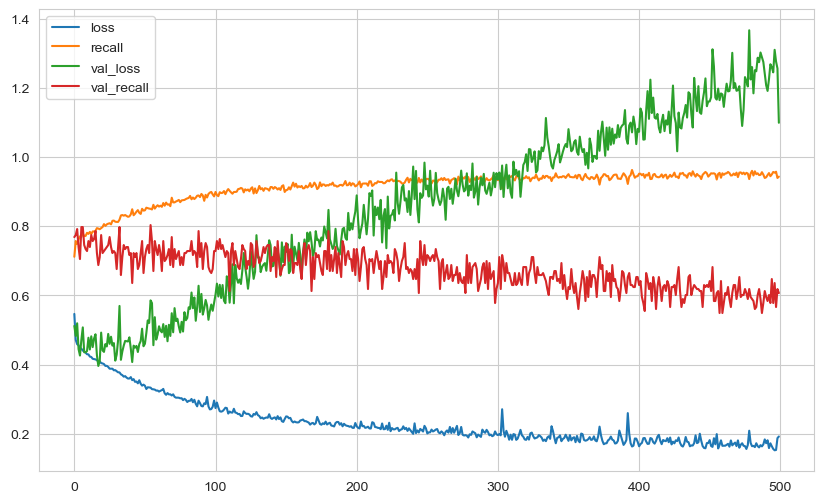

In [84]:
loss_df3.plot()
plt.show()
# shows that the model is overfitting the training data and not generalizing well to new data.
# as the training loss is decreasing and the validation loss is increasing.

In [85]:
loss, Recall = model3.evaluate(X_test_Transformed, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", Recall)
# When we take a look at loss values we can see that the model is performing well on the training data and validation data,
# but it is performing poorly on the testing data.
# We notice that the model's recall score is decreasing on the validation data and on the testing data.
# This is not a good sign, as it indicates that the model is overfitting the training data.

loss:  1.382117509841919
recall:  0.529411792755127


In [86]:
y_pred3 =(model3.predict(X_test_Transformed) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred3))
print(classification_report(y_test, y_pred3))

47/47 [==============================] - 0s 2ms/step
[[1004  190]
 [ 144  162]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      1194
           1       0.46      0.53      0.49       306

    accuracy                           0.78      1500
   macro avg       0.67      0.69      0.67      1500
weighted avg       0.79      0.78      0.78      1500



In [87]:
my_dict = {
    "Actual": y_test,
    "Pred": y_pred3.reshape(
        -1,
    ),
}
compare = pd.DataFrame(my_dict)
compare.sample(10)

,Actual,Pred
2488,0,0
2598,0,0
4671,1,1
5814,0,0
3317,1,0
6599,1,0
4813,0,0
4016,0,0
7100,0,0
7261,0,0


47/47 [==============================] - 0s 2ms/step


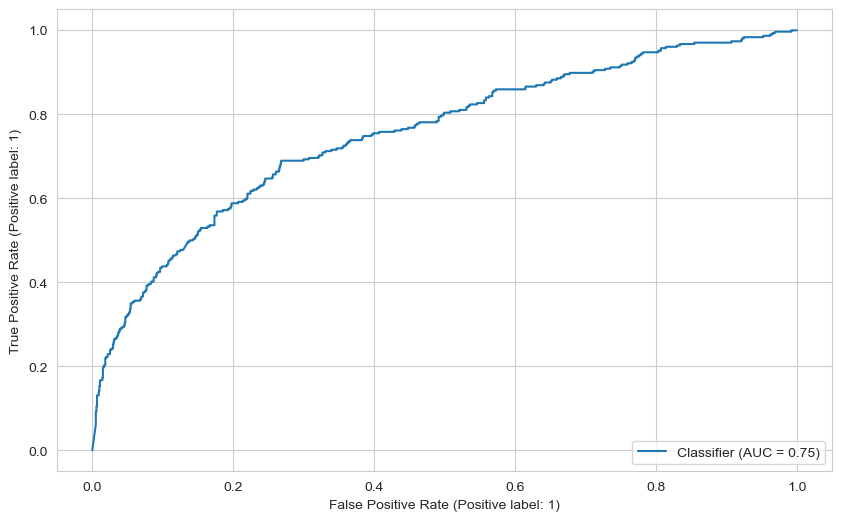

In [88]:
y_pred_proba3 = model3.predict(X_test_Transformed)
RocCurveDisplay.from_predictions(y_test, y_pred_proba3)

In [89]:
roc_auc_score(y_test, y_pred_proba3)

0.7532939753232393

### Add Dropout Layer

In [90]:
# import the Dropout layer from which is useful for preventing the overfitting of neural network models.
from tensorflow.keras.layers import Dropout

In [91]:
# initiate the forth model (model4) with class_weigth and Dropout
model4 = Sequential()

model4.add(Dense(40, activation="relu", input_dim=X_train_Transformed.shape[1]))
model4.add(Dropout(0.5))

model4.add(Dense(20, activation="relu"))
model4.add(Dropout(0.5))

model4.add(Dense(10, activation="relu"))
model4.add(Dropout(0.5))

model4.add(Dense(1, activation='sigmoid'))
    

In [92]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 40)                560       
                                                                 
 dropout (Dropout)           (None, 40)                0         
                                                                 
 dense_13 (Dense)            (None, 20)                820       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_14 (Dense)            (None, 10)                210       
                                                                 
 dropout_2 (Dropout)         (None, 10)                0         
                                                                 
 dense_15 (Dense)            (None, 1)                

In [93]:
model4.weights

[<tf.Variable 'dense_12/kernel:0' shape=(13, 40) dtype=float32, numpy=
 array([[-0.15846224,  0.02612302, -0.23327579, -0.20380257,  0.07058343,
         -0.30502856,  0.10409665, -0.20745173, -0.30904096,  0.04952502,
         -0.30935824,  0.3066586 , -0.33339685, -0.1350649 ,  0.31796637,
          0.12870392, -0.247442  , -0.14673461,  0.06850991,  0.21182778,
         -0.17953765, -0.3171678 , -0.33213043,  0.15710375,  0.28401956,
          0.16992804, -0.31504872,  0.1762602 ,  0.14898926,  0.08065382,
          0.26980355, -0.03904456,  0.21938208,  0.3193861 ,  0.27502146,
         -0.04411057,  0.01512402,  0.22649935, -0.062987  ,  0.24632671],
        [-0.10626312,  0.07938105, -0.22625935,  0.04517096,  0.13505745,
          0.30417672, -0.24915573, -0.18249734,  0.2299374 ,  0.04508555,
          0.3028992 , -0.15885468,  0.22996405,  0.0215888 , -0.07418838,
          0.20995232, -0.03167555, -0.04638252, -0.06783158,  0.10784608,
         -0.26732984, -0.05207038,  0.18

In [94]:
model4.compile(optimizer='Adam',loss='binary_crossentropy', metrics='Recall')

In [95]:
model4.fit(
    x=X_train_Transformed, y=y_train, validation_data=(X_val_Transformed,y_val),
    batch_size=32, epochs=500, verbose=1, class_weight=class_weights
)

Epoch 1/500
240/240 [==============================] - 2s 4ms/step - loss: 0.7158 - recall: 0.5770 - val_loss: 0.7027 - val_recall: 0.8439
Epoch 2/500
240/240 [==============================] - 1s 3ms/step - loss: 0.6908 - recall: 0.6617 - val_loss: 0.6930 - val_recall: 0.8439
Epoch 3/500
240/240 [==============================] - 1s 3ms/step - loss: 0.6766 - recall: 0.6521 - val_loss: 0.6787 - val_recall: 0.8439
Epoch 4/500
240/240 [==============================] - 1s 3ms/step - loss: 0.6623 - recall: 0.7227 - val_loss: 0.6430 - val_recall: 0.7399
Epoch 5/500
240/240 [==============================] - 1s 3ms/step - loss: 0.6475 - recall: 0.6579 - val_loss: 0.6122 - val_recall: 0.7399
Epoch 6/500
240/240 [==============================] - 1s 3ms/step - loss: 0.6386 - recall: 0.6938 - val_loss: 0.5930 - val_recall: 0.7283
Epoch 7/500
240/240 [==============================] - 1s 3ms/step - loss: 0.6198 - recall: 0.6585 - val_loss: 0.5888 - val_recall: 0.7630
Epoch 8/500
240/240 [======

240/240 [==============================] - 1s 3ms/step - loss: 0.5075 - recall: 0.7632 - val_loss: 0.4738 - val_recall: 0.7514
Epoch 60/500
240/240 [==============================] - 1s 3ms/step - loss: 0.5049 - recall: 0.7612 - val_loss: 0.4519 - val_recall: 0.7630
Epoch 61/500
240/240 [==============================] - 1s 3ms/step - loss: 0.5046 - recall: 0.7670 - val_loss: 0.4553 - val_recall: 0.7457
Epoch 62/500
240/240 [==============================] - 1s 3ms/step - loss: 0.4925 - recall: 0.7734 - val_loss: 0.4472 - val_recall: 0.7572
Epoch 63/500
240/240 [==============================] - 1s 3ms/step - loss: 0.4961 - recall: 0.7625 - val_loss: 0.4497 - val_recall: 0.7399
Epoch 64/500
240/240 [==============================] - 1s 3ms/step - loss: 0.4977 - recall: 0.7638 - val_loss: 0.4593 - val_recall: 0.7341
Epoch 65/500
240/240 [==============================] - 1s 3ms/step - loss: 0.4994 - recall: 0.7599 - val_loss: 0.4490 - val_recall: 0.7399
Epoch 66/500
240/240 [===========

240/240 [==============================] - 1s 3ms/step - loss: 0.4902 - recall: 0.7651 - val_loss: 0.4531 - val_recall: 0.7225
Epoch 118/500
240/240 [==============================] - 1s 3ms/step - loss: 0.4959 - recall: 0.7587 - val_loss: 0.4563 - val_recall: 0.7225
Epoch 119/500
240/240 [==============================] - 1s 3ms/step - loss: 0.4928 - recall: 0.7715 - val_loss: 0.4518 - val_recall: 0.7225
Epoch 120/500
240/240 [==============================] - 1s 3ms/step - loss: 0.4911 - recall: 0.7709 - val_loss: 0.4402 - val_recall: 0.7341
Epoch 121/500
240/240 [==============================] - 1s 4ms/step - loss: 0.4826 - recall: 0.7766 - val_loss: 0.4508 - val_recall: 0.7283
Epoch 122/500
240/240 [==============================] - 1s 3ms/step - loss: 0.4885 - recall: 0.7831 - val_loss: 0.4492 - val_recall: 0.7283
Epoch 123/500
240/240 [==============================] - 1s 3ms/step - loss: 0.5041 - recall: 0.7689 - val_loss: 0.4620 - val_recall: 0.7341
Epoch 124/500
240/240 [====

240/240 [==============================] - 8s 32ms/step - loss: 0.4775 - recall: 0.7837 - val_loss: 0.4517 - val_recall: 0.7457
Epoch 176/500
240/240 [==============================] - 12s 49ms/step - loss: 0.4808 - recall: 0.7811 - val_loss: 0.4436 - val_recall: 0.7457
Epoch 177/500
240/240 [==============================] - 7s 30ms/step - loss: 0.4854 - recall: 0.7792 - val_loss: 0.4335 - val_recall: 0.7457
Epoch 178/500
240/240 [==============================] - 8s 33ms/step - loss: 0.4843 - recall: 0.7920 - val_loss: 0.4309 - val_recall: 0.7341
Epoch 179/500
240/240 [==============================] - 5s 23ms/step - loss: 0.4822 - recall: 0.7786 - val_loss: 0.4448 - val_recall: 0.7514
Epoch 180/500
240/240 [==============================] - 6s 25ms/step - loss: 0.4834 - recall: 0.7882 - val_loss: 0.4423 - val_recall: 0.7457
Epoch 181/500
240/240 [==============================] - 9s 36ms/step - loss: 0.4835 - recall: 0.7985 - val_loss: 0.4393 - val_recall: 0.7399
Epoch 182/500
240/2

Epoch 233/500
240/240 [==============================] - 2s 7ms/step - loss: 0.4819 - recall: 0.8017 - val_loss: 0.4334 - val_recall: 0.7572
Epoch 234/500
240/240 [==============================] - 2s 7ms/step - loss: 0.4833 - recall: 0.7882 - val_loss: 0.4496 - val_recall: 0.7630
Epoch 235/500
240/240 [==============================] - 2s 6ms/step - loss: 0.4815 - recall: 0.7991 - val_loss: 0.4502 - val_recall: 0.7803
Epoch 236/500
240/240 [==============================] - 1s 6ms/step - loss: 0.4908 - recall: 0.8074 - val_loss: 0.4370 - val_recall: 0.7572
Epoch 237/500
240/240 [==============================] - 1s 6ms/step - loss: 0.4863 - recall: 0.8030 - val_loss: 0.4581 - val_recall: 0.7688
Epoch 238/500
240/240 [==============================] - 1s 5ms/step - loss: 0.4757 - recall: 0.8113 - val_loss: 0.4234 - val_recall: 0.7514
Epoch 239/500
240/240 [==============================] - 1s 5ms/step - loss: 0.4791 - recall: 0.8023 - val_loss: 0.4452 - val_recall: 0.7746
Epoch 240/500

240/240 [==============================] - 1s 3ms/step - loss: 0.4814 - recall: 0.7927 - val_loss: 0.4489 - val_recall: 0.7457
Epoch 292/500
240/240 [==============================] - 1s 3ms/step - loss: 0.4856 - recall: 0.7959 - val_loss: 0.4364 - val_recall: 0.7283
Epoch 293/500
240/240 [==============================] - 1s 3ms/step - loss: 0.4815 - recall: 0.8004 - val_loss: 0.4442 - val_recall: 0.7630
Epoch 294/500
240/240 [==============================] - 1s 3ms/step - loss: 0.4861 - recall: 0.7965 - val_loss: 0.4474 - val_recall: 0.7572
Epoch 295/500
240/240 [==============================] - 1s 3ms/step - loss: 0.4812 - recall: 0.8094 - val_loss: 0.4421 - val_recall: 0.7457
Epoch 296/500
240/240 [==============================] - 1s 4ms/step - loss: 0.4770 - recall: 0.7978 - val_loss: 0.4574 - val_recall: 0.7572
Epoch 297/500
240/240 [==============================] - 1s 3ms/step - loss: 0.4887 - recall: 0.8081 - val_loss: 0.4493 - val_recall: 0.7572
Epoch 298/500
240/240 [====

240/240 [==============================] - 1s 3ms/step - loss: 0.4805 - recall: 0.7991 - val_loss: 0.4534 - val_recall: 0.7746
Epoch 350/500
240/240 [==============================] - 1s 3ms/step - loss: 0.4766 - recall: 0.8049 - val_loss: 0.4460 - val_recall: 0.7630
Epoch 351/500
240/240 [==============================] - 1s 3ms/step - loss: 0.4801 - recall: 0.8055 - val_loss: 0.4505 - val_recall: 0.7746
Epoch 352/500
240/240 [==============================] - 1s 3ms/step - loss: 0.4766 - recall: 0.8145 - val_loss: 0.4573 - val_recall: 0.7746
Epoch 353/500
240/240 [==============================] - 1s 3ms/step - loss: 0.4805 - recall: 0.8062 - val_loss: 0.4359 - val_recall: 0.7572
Epoch 354/500
240/240 [==============================] - 1s 3ms/step - loss: 0.4729 - recall: 0.8023 - val_loss: 0.4432 - val_recall: 0.7746
Epoch 355/500
240/240 [==============================] - 1s 3ms/step - loss: 0.4915 - recall: 0.8055 - val_loss: 0.4456 - val_recall: 0.7746
Epoch 356/500
240/240 [====

240/240 [==============================] - 1s 3ms/step - loss: 0.4802 - recall: 0.8042 - val_loss: 0.4410 - val_recall: 0.7399
Epoch 408/500
240/240 [==============================] - 1s 3ms/step - loss: 0.4725 - recall: 0.8107 - val_loss: 0.4419 - val_recall: 0.7514
Epoch 409/500
240/240 [==============================] - 1s 3ms/step - loss: 0.4744 - recall: 0.8107 - val_loss: 0.4378 - val_recall: 0.7514
Epoch 410/500
240/240 [==============================] - 1s 3ms/step - loss: 0.4815 - recall: 0.8068 - val_loss: 0.4467 - val_recall: 0.7572
Epoch 411/500
240/240 [==============================] - 1s 3ms/step - loss: 0.4743 - recall: 0.8100 - val_loss: 0.4471 - val_recall: 0.7457
Epoch 412/500
240/240 [==============================] - 1s 3ms/step - loss: 0.4752 - recall: 0.8042 - val_loss: 0.4365 - val_recall: 0.7225
Epoch 413/500
240/240 [==============================] - 1s 3ms/step - loss: 0.4780 - recall: 0.8062 - val_loss: 0.4443 - val_recall: 0.7514
Epoch 414/500
240/240 [====

240/240 [==============================] - 1s 3ms/step - loss: 0.4813 - recall: 0.8010 - val_loss: 0.4403 - val_recall: 0.7514
Epoch 466/500
240/240 [==============================] - 1s 3ms/step - loss: 0.4788 - recall: 0.8042 - val_loss: 0.4384 - val_recall: 0.7630
Epoch 467/500
240/240 [==============================] - 1s 3ms/step - loss: 0.4780 - recall: 0.8042 - val_loss: 0.4308 - val_recall: 0.7457
Epoch 468/500
240/240 [==============================] - 1s 3ms/step - loss: 0.4792 - recall: 0.8126 - val_loss: 0.4392 - val_recall: 0.7572
Epoch 469/500
240/240 [==============================] - 1s 3ms/step - loss: 0.4821 - recall: 0.8190 - val_loss: 0.4465 - val_recall: 0.7457
Epoch 470/500
240/240 [==============================] - 1s 3ms/step - loss: 0.4683 - recall: 0.8049 - val_loss: 0.4337 - val_recall: 0.7514
Epoch 471/500
240/240 [==============================] - 1s 3ms/step - loss: 0.4765 - recall: 0.8094 - val_loss: 0.4416 - val_recall: 0.7572
Epoch 472/500
240/240 [====

In [96]:
model4.weights

[<tf.Variable 'dense_12/kernel:0' shape=(13, 40) dtype=float32, numpy=
 array([[ 3.85934301e-02, -8.50047246e-02, -2.22421229e-01,
         -3.07215482e-01, -3.75399552e-02, -7.51965791e-02,
          2.08964810e-01,  5.43029560e-03, -2.04664052e-01,
         -9.00981873e-02,  2.56681651e-01,  4.54705954e-02,
         -1.84611872e-01, -1.94455877e-01,  5.24868786e-01,
         -1.86587721e-02,  2.52410397e-02, -4.31403875e-01,
          3.78454506e-01,  2.38712281e-01,  1.32488757e-01,
         -2.17886478e-01,  8.27578530e-02,  3.59737068e-01,
          1.69897944e-01,  1.67001411e-01, -3.40366393e-01,
          1.18354946e-01,  3.61160845e-01,  3.87165725e-01,
          8.11794028e-02,  1.81747660e-01,  1.56787992e-01,
         -9.12246034e-02, -5.26392683e-02,  1.41831949e-01,
         -1.17977976e-03,  7.46674538e-02, -3.69275928e-01,
          1.89531654e-01],
        [ 1.27506033e-01,  5.14541507e-01, -6.70305192e-02,
          3.02611440e-01,  7.34900590e-03, -7.81601444e-02,
  

In [97]:
loss_df4 = pd.DataFrame(model4.history.history)
loss_df4.head()

,loss,recall,val_loss,val_recall
0,0.716,0.577,0.703,0.844
1,0.691,0.662,0.693,0.844
2,0.677,0.652,0.679,0.844
3,0.662,0.723,0.643,0.740
4,0.648,0.658,0.612,0.740


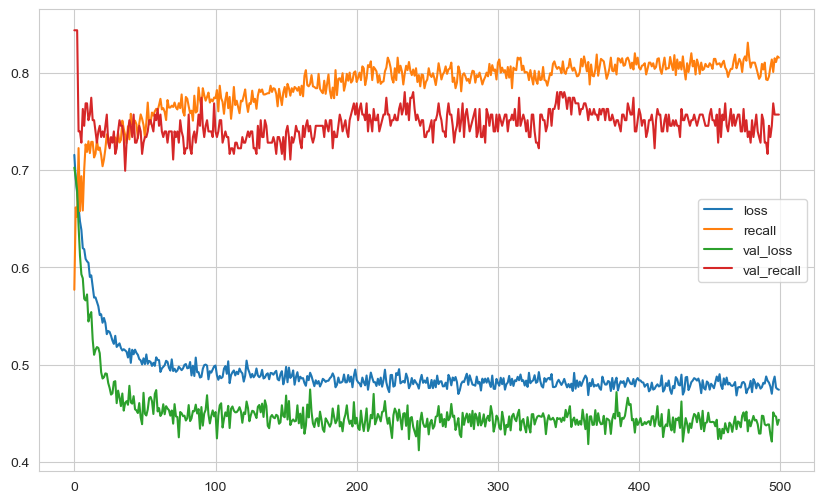

In [98]:
loss_df4.plot()
plt.show()
# We notice that the validation loss is lower than the training loss, which is a good sign.
# This shows that the model is performing well on the training data and validation data.

In [99]:
loss, Recall = model4.evaluate(X_test_Transformed, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", Recall)
# the model's recall score is decreasing as we move from the training data to the validation data to the testing data.
# This is not a good sign, as it indicates that the model is overfitting the training data.

loss:  0.45762693881988525
recall:  0.7156862616539001


In [100]:
y_pred4 =(model4.predict(X_test_Transformed) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred4))
print(classification_report(y_test, y_pred4))

47/47 [==============================] - 0s 2ms/step
[[940 254]
 [ 87 219]]
              precision    recall  f1-score   support

           0       0.92      0.79      0.85      1194
           1       0.46      0.72      0.56       306

    accuracy                           0.77      1500
   macro avg       0.69      0.75      0.70      1500
weighted avg       0.82      0.77      0.79      1500



In [101]:
my_dict = {
    "Actual": y_test,
    "Pred": y_pred4.reshape(
        -1,
    ),
}
compare = pd.DataFrame(my_dict)
compare.sample(10)

,Actual,Pred
9401,1,1
4355,0,1
2467,0,0
5767,0,0
5877,0,0
1080,0,1
2020,0,0
9094,0,1
5776,1,1
5948,0,1


47/47 [==============================] - 0s 2ms/step


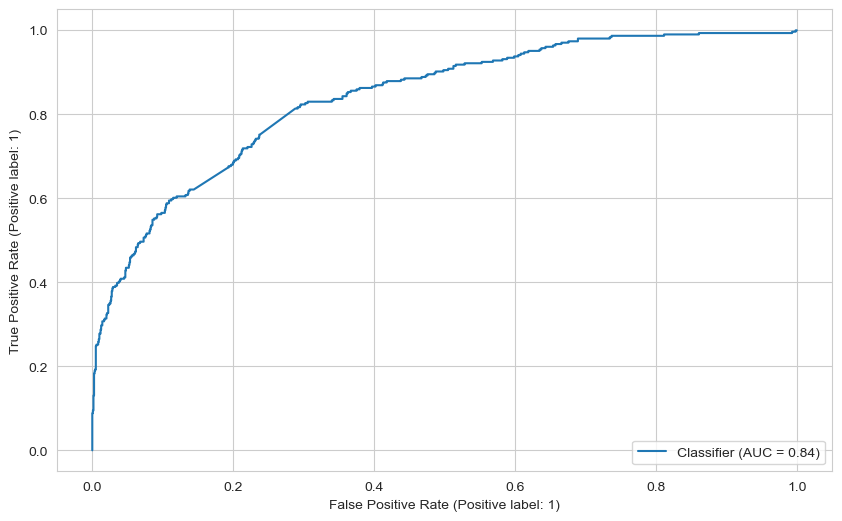

In [102]:
y_pred_proba4 = model4.predict(X_test_Transformed)
RocCurveDisplay.from_predictions(y_test, y_pred_proba4)

In [103]:
roc_auc_score(y_test, y_pred_proba4)

0.8393957806461502

### Add Early Stop

#### Monitor the "val_loss" as metric

In [104]:
# import the EarlyStopping callback which is useful for preventing the overfitting of neural network models.
from tensorflow.keras.callbacks import EarlyStopping

In [105]:
# initiate the fifth model (model5) with class_weigth and early stop (Monitor the "val_loss" as metric)
model5 = Sequential()

model5.add(Dense(40, activation="relu", input_dim=X_train_Transformed.shape[1]))
model5.add(Dense(20, activation="relu"))
model5.add(Dense(10, activation="relu"))
model5.add(Dense(1, activation='sigmoid'))

In [106]:
model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 40)                560       
                                                                 
 dense_17 (Dense)            (None, 20)                820       
                                                                 
 dense_18 (Dense)            (None, 10)                210       
                                                                 
 dense_19 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1601 (6.25 KB)
Trainable params: 1601 (6.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [107]:
model5.weights

[<tf.Variable 'dense_16/kernel:0' shape=(13, 40) dtype=float32, numpy=
 array([[-0.0121434 , -0.0625433 , -0.3299336 ,  0.1727511 ,  0.02336204,
         -0.3190001 , -0.31818458,  0.30733863,  0.30127016,  0.01930672,
          0.27304724, -0.29489857, -0.12141146, -0.12874629,  0.24237278,
          0.10423332,  0.22222635, -0.18451604, -0.05399469,  0.22566107,
         -0.05046359,  0.10177019,  0.27476075, -0.26141593,  0.29705694,
          0.00878409,  0.11689439,  0.18557099, -0.02924949, -0.144636  ,
          0.29209742, -0.1137924 ,  0.04161343, -0.15917604, -0.04278332,
          0.09957951, -0.2995999 , -0.27624956, -0.16281623, -0.02820873],
        [ 0.23874417, -0.21137741, -0.30941454, -0.08655889,  0.3300329 ,
          0.26578495,  0.21763203,  0.29522762, -0.11218642,  0.11361048,
         -0.07342663,  0.08918142, -0.0295192 , -0.02607995,  0.07077932,
         -0.2917956 , -0.03464213,  0.18394658,  0.2564725 ,  0.32808343,
         -0.13068326,  0.19368002, -0.20

In [108]:
model5.compile(optimizer='Adam',loss='binary_crossentropy', metrics='Recall')

In [109]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True
)

In [110]:
model5.fit(
    x=X_train_Transformed, y=y_train, validation_data=(X_val_Transformed,y_val),
    batch_size=32, epochs=500, verbose=1, class_weight=class_weights, callbacks=[early_stop]
)

Epoch 1/500
240/240 [==============================] - 2s 4ms/step - loss: 0.6430 - recall: 0.6444 - val_loss: 0.5709 - val_recall: 0.7514
Epoch 2/500
240/240 [==============================] - 1s 3ms/step - loss: 0.5200 - recall: 0.7445 - val_loss: 0.5090 - val_recall: 0.7457
Epoch 3/500
240/240 [==============================] - 1s 2ms/step - loss: 0.4762 - recall: 0.7516 - val_loss: 0.5039 - val_recall: 0.7688
Epoch 4/500
240/240 [==============================] - 1s 2ms/step - loss: 0.4630 - recall: 0.7632 - val_loss: 0.4472 - val_recall: 0.7341
Epoch 5/500
240/240 [==============================] - 1s 3ms/step - loss: 0.4540 - recall: 0.7606 - val_loss: 0.4411 - val_recall: 0.7168
Epoch 6/500
240/240 [==============================] - 1s 2ms/step - loss: 0.4496 - recall: 0.7677 - val_loss: 0.4575 - val_recall: 0.7572
Epoch 7/500
240/240 [==============================] - 1s 2ms/step - loss: 0.4438 - recall: 0.7721 - val_loss: 0.4779 - val_recall: 0.7688
Epoch 8/500
240/240 [======

In [111]:
model5.weights

[<tf.Variable 'dense_16/kernel:0' shape=(13, 40) dtype=float32, numpy=
 array([[ 1.84170768e-01, -2.20895950e-02, -4.14548546e-01,
          2.33904824e-01,  1.05908565e-01, -4.07787800e-01,
         -2.36075208e-01,  3.96098852e-01,  5.52310385e-02,
         -1.77842006e-01,  1.49436340e-01, -2.58918911e-01,
         -1.03420705e-01, -2.35514835e-01,  4.26609218e-01,
          9.07188281e-02,  2.72014022e-01,  4.16613631e-02,
         -1.85319204e-02,  1.95311695e-01, -2.22663973e-02,
         -2.47353148e-02,  4.79101300e-01, -2.68328130e-01,
          3.39340180e-01, -1.12620955e-02,  1.22215308e-01,
          3.65283601e-02,  5.05290143e-02, -1.83614612e-01,
          1.95453316e-01, -1.93869784e-01, -5.62929101e-02,
         -2.56586939e-01, -1.26274183e-01,  2.32118547e-01,
         -2.17821047e-01, -1.00837387e-01, -1.74059778e-01,
         -9.13783759e-02],
        [ 2.14070201e-01, -1.83478087e-01, -5.47892690e-01,
         -1.56154603e-01,  2.14964360e-01,  2.55711526e-01,
  

In [112]:
loss_df5 = pd.DataFrame(model5.history.history)
loss_df5.head()

,loss,recall,val_loss,val_recall
0,0.643,0.644,0.571,0.751
1,0.520,0.745,0.509,0.746
2,0.476,0.752,0.504,0.769
3,0.463,0.763,0.447,0.734
4,0.454,0.761,0.441,0.717


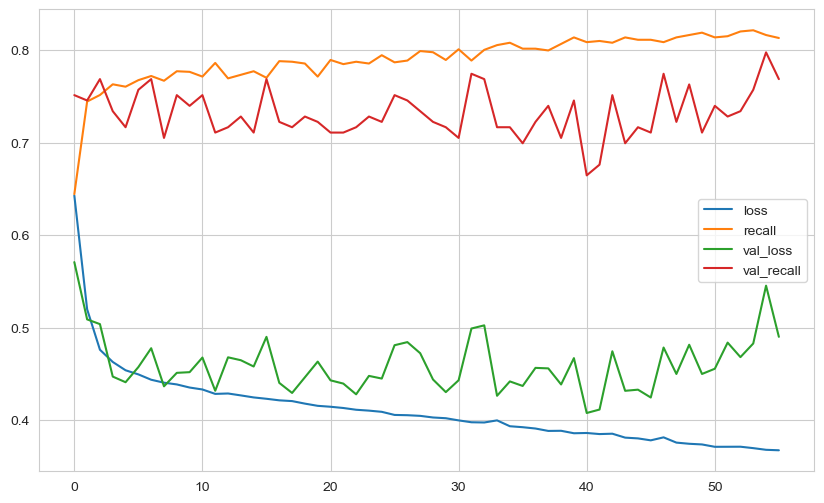

In [113]:
loss_df5.plot()
plt.show()

In [114]:
loss, Recall = model5.evaluate(X_test_Transformed, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", Recall)
# when we take a look at loss values, we could think that the model is performing well and is ready to be used.
# but when taking a look at recal values, we could think that the model is learning the patterns in the training data well,
# but it is not able to generalize those patterns to new data.

loss:  0.42934945225715637
recall:  0.601307213306427


In [115]:
y_pred5 =(model5.predict(X_test_Transformed) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred5))
print(classification_report(y_test, y_pred5))

47/47 [==============================] - 0s 2ms/step
[[1018  176]
 [ 122  184]]
              precision    recall  f1-score   support

           0       0.89      0.85      0.87      1194
           1       0.51      0.60      0.55       306

    accuracy                           0.80      1500
   macro avg       0.70      0.73      0.71      1500
weighted avg       0.82      0.80      0.81      1500



In [116]:
my_dict = {
    "Actual": y_test,
    "Pred": y_pred5.reshape(
        -1,
    ),
}
compare = pd.DataFrame(my_dict)
compare.sample(10)

,Actual,Pred
266,0,0
4875,0,0
8783,1,0
6890,1,1
2302,0,0
7438,0,0
3465,0,0
2797,0,0
4192,0,0
8924,0,0


47/47 [==============================] - 0s 2ms/step


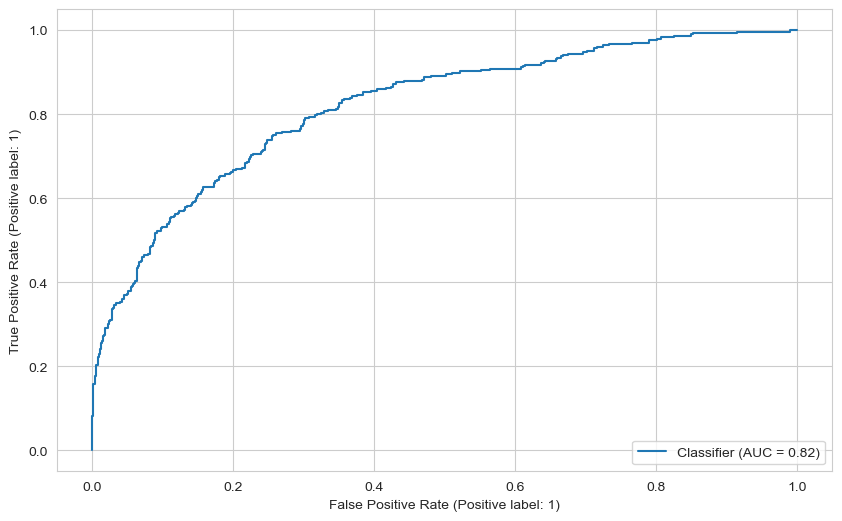

In [117]:
y_pred_proba5 = model5.predict(X_test_Transformed)
RocCurveDisplay.from_predictions(y_test, y_pred_proba5)

In [118]:
roc_auc_score(y_test, y_pred_proba5)

0.8187068238797472

#### Monitor the "val_recall" as metric

In [212]:
# initiate the sixsth model (model6) with class_weigth and early stop (Monitor the "val_recall" as metric)
model6 = Sequential()

model6.add(Dense(40, activation="relu", input_dim=X_train_Transformed.shape[1]))
model6.add(Dense(20, activation="relu"))
model6.add(Dense(10, activation="relu"))
model6.add(Dense(1, activation='sigmoid'))

In [213]:
model6.summary()

Model: "sequential_112"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_445 (Dense)           (None, 40)                560       
                                                                 
 dense_446 (Dense)           (None, 20)                820       
                                                                 
 dense_447 (Dense)           (None, 10)                210       
                                                                 
 dense_448 (Dense)           (None, 1)                 11        
                                                                 
Total params: 1601 (6.25 KB)
Trainable params: 1601 (6.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [214]:
model6.weights

[<tf.Variable 'dense_445/kernel:0' shape=(13, 40) dtype=float32, numpy=
 array([[-0.19777666, -0.08971304,  0.2778323 ,  0.21377566,  0.14798027,
          0.3204377 , -0.27940828, -0.22661118, -0.1354562 ,  0.23033056,
          0.05762011, -0.01867571,  0.10848269, -0.31700125, -0.07502258,
         -0.10082828, -0.21907356, -0.30251113,  0.24373373, -0.03659233,
         -0.17653738,  0.21826342, -0.260347  , -0.23516776, -0.07163164,
          0.25716594, -0.3074666 , -0.32784754, -0.3075391 , -0.14415036,
         -0.03886327,  0.11504135, -0.22795942,  0.28898785,  0.23287311,
         -0.23321146, -0.3307733 ,  0.2990496 , -0.30426857,  0.316725  ],
        [ 0.0934251 , -0.14406188, -0.14491236, -0.16211101, -0.2576564 ,
          0.31115207,  0.17494252,  0.24595681, -0.3232326 ,  0.29852948,
          0.04774159, -0.04408529, -0.07198235,  0.29991302,  0.1497978 ,
         -0.16840573,  0.31879655, -0.32951048, -0.2563501 , -0.26484936,
         -0.10954641,  0.21315011, -0.3

In [215]:
model6.compile(optimizer='Adam',loss='binary_crossentropy', metrics='Recall')

In [216]:
early_stop = EarlyStopping(
    monitor="val_recall", mode="max", verbose=1, patience=15, restore_best_weights=True
)

In [217]:
model6.fit(
    x=X_train_Transformed, y=y_train, validation_data=(X_val_Transformed,y_val),
    batch_size=32, epochs=500, verbose=1, class_weight=class_weights, callbacks=[early_stop]
)

Epoch 1/500
240/240 [==============================] - 5s 7ms/step - loss: 0.6331 - recall: 0.5757 - val_loss: 0.5626 - val_recall: 0.7630
Epoch 2/500
240/240 [==============================] - 1s 4ms/step - loss: 0.5310 - recall: 0.7542 - val_loss: 0.5212 - val_recall: 0.7803
Epoch 3/500
240/240 [==============================] - 1s 4ms/step - loss: 0.4968 - recall: 0.7689 - val_loss: 0.5201 - val_recall: 0.7861
Epoch 4/500
240/240 [==============================] - 1s 4ms/step - loss: 0.4789 - recall: 0.7779 - val_loss: 0.4748 - val_recall: 0.7861
Epoch 5/500
240/240 [==============================] - 1s 4ms/step - loss: 0.4640 - recall: 0.7721 - val_loss: 0.4289 - val_recall: 0.7399
Epoch 6/500
240/240 [==============================] - 1s 4ms/step - loss: 0.4567 - recall: 0.7644 - val_loss: 0.4662 - val_recall: 0.7861
Epoch 7/500
240/240 [==============================] - 1s 4ms/step - loss: 0.4484 - recall: 0.7754 - val_loss: 0.4734 - val_recall: 0.7861
Epoch 8/500
240/240 [======

In [218]:
model6.weights

[<tf.Variable 'dense_445/kernel:0' shape=(13, 40) dtype=float32, numpy=
 array([[-7.40915909e-02, -1.07075609e-01,  2.95689821e-01,
          1.62020147e-01,  5.40274270e-02,  2.60836303e-01,
         -1.84792906e-01, -2.36522928e-01, -7.81441778e-02,
          2.60505855e-01, -1.47161499e-01, -3.30583639e-02,
          7.34251216e-02, -3.74927521e-01, -1.13807350e-01,
         -1.20130628e-01, -1.23403579e-01, -2.61323452e-01,
          3.60733479e-01,  1.37550943e-02, -1.32084399e-01,
          2.61101544e-01, -3.53304207e-01, -2.14030519e-01,
         -1.00655958e-01,  2.83491820e-01, -3.17342788e-01,
         -5.04723430e-01, -3.23831707e-01, -4.68903296e-02,
         -1.04440182e-01,  2.74047107e-01, -9.39505398e-02,
          3.06682438e-01,  2.14998126e-01, -2.49501675e-01,
         -3.56294870e-01,  2.20335349e-01, -2.29738519e-01,
          4.09517497e-01],
        [-8.50125924e-02, -1.70049369e-01, -2.56168067e-01,
         -5.68735190e-02, -1.00104935e-01,  3.59732598e-01,
 

In [219]:
loss_df6 = pd.DataFrame(model6.history.history)
loss_df6.head()

,loss,recall,val_loss,val_recall
0,0.633,0.576,0.563,0.763
1,0.531,0.754,0.521,0.780
2,0.497,0.769,0.520,0.786
3,0.479,0.778,0.475,0.786
4,0.464,0.772,0.429,0.740


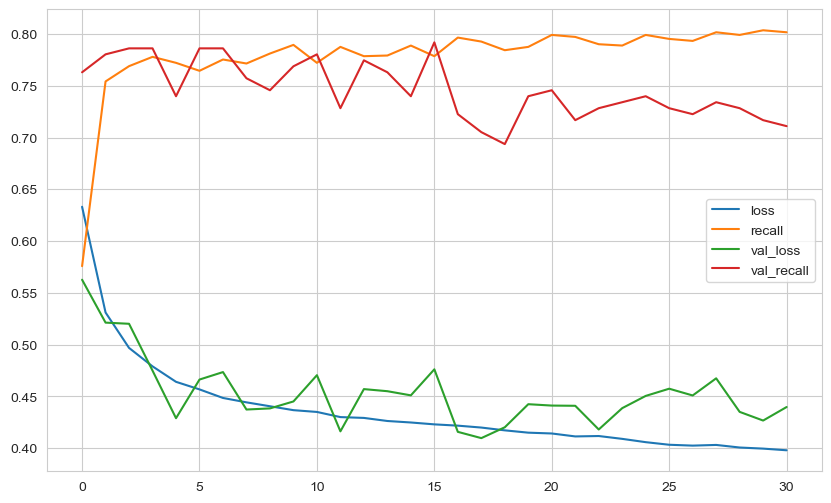

In [220]:
loss_df6.plot()
plt.show()

In [221]:
loss, Recall = model6.evaluate(X_test_Transformed, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", Recall)
# The loss training, validation and testing scores indicating that the model is overfitting the training data.
# The recal training, validation and testing scores indicating that the model is performing well on the training data and the validation data,
# but it seems not generalizing well to new data.

loss:  0.5032931566238403
recall:  0.7516340017318726


In [222]:
y_pred6 =(model6.predict(X_test_Transformed) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred6))
print(classification_report(y_test, y_pred6))

47/47 [==============================] - 0s 3ms/step
[[899 295]
 [ 76 230]]
              precision    recall  f1-score   support

           0       0.92      0.75      0.83      1194
           1       0.44      0.75      0.55       306

    accuracy                           0.75      1500
   macro avg       0.68      0.75      0.69      1500
weighted avg       0.82      0.75      0.77      1500



In [223]:
my_dict = {
    "Actual": y_test,
    "Pred": y_pred6.reshape(
        -1,
    ),
}
compare = pd.DataFrame(my_dict)
compare.sample(10)

,Actual,Pred
2000,0,1
1968,0,1
7610,0,0
5964,0,0
6970,0,0
8380,0,0
4308,0,1
3726,1,1
4512,1,1
5829,0,0


47/47 [==============================] - 0s 3ms/step


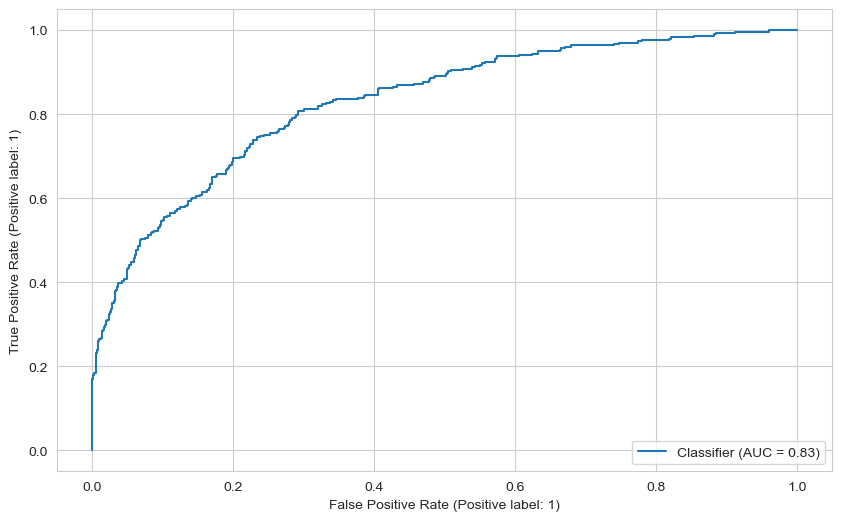

In [224]:
y_pred_proba6 = model6.predict(X_test_Transformed)
RocCurveDisplay.from_predictions(y_test, y_pred_proba6)

In [225]:
roc_auc_score(y_test, y_pred_proba6)

0.8295480671330508

## Optuna

In [119]:
#!pip install optuna

In [120]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
import optuna

In [121]:
early_stop = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True)

In [185]:
trial_metric = "Recall"
seed=101

def create_model(trial):    # Some hyperparameters we want to optimize
    n_units1 = trial.suggest_int("n_units1", 5, 40)
    n_units2 = trial.suggest_int("n_units2", 5, 20)
    n_units3 = trial.suggest_int("n_units3", 5, 10)
    
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam])
    learning_rate = trial.suggest_loguniform("learning_rate", 0.0001, 0.13)
    
    dropout1 = trial.suggest_float("dropout1", 0.1, 0.5)
    dropout2 = trial.suggest_float("dropout2", 0.1, 0.5)
    dropout3 = trial.suggest_float("dropout3", 0.1, 0.5)
    
    tf.random.set_seed(seed)
    model = Sequential()
    model.add(Dense(n_units1, input_dim=X_train_Transformed.shape[1], activation="relu"))
    model.add(Dropout(dropout1))              
    model.add(Dense(n_units2, activation="relu"))
    model.add(Dropout(dropout2))
    model.add(Dense(n_units3, activation="relu"))
    model.add(Dropout(dropout3))
    model.add(Dense(1, activation="sigmoid"))
    model.compile( loss="binary_crossentropy",optimizer=optimizer(learning_rate=learning_rate), metrics=[trial_metric])
    return model

def objective(trial):
    model = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.01, 3)
    w1 = trial.suggest_loguniform("w1", 0.01, 3)
    model.fit(X_train_Transformed,
              y_train,
              validation_data=(X_val_Transformed,y_val),
              batch_size=32,
              epochs=100,
              callbacks=[early_stop],
              class_weight={0: w0, 1: w1},
              verbose=1)    
    score = model.evaluate(X_test_Transformed, y_test, verbose=0)[1]
    return score

In [186]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=15)
study.best_params

[I 2023-10-30 19:41:41,324] A new study created in memory with name: no-name-02cd1247-ea66-4d23-a2a0-f26afb9545ff
C:\Users\yahya\anaconda3\Lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adam.Adam'> which is of type type.
  warnings.warn(message)
C:\Users\yahya\anaconda3\Lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adadelta.Adadelta'> which is of type type.
  warnings.warn(message)
C:\Users\yahya\anaconda3\Lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.rmsprop.RMSprop'> which is of type 

Epoch 1/100


C:\Users\yahya\AppData\Local\Temp\ipykernel_856888\3808873432.py:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  w0 = trial.suggest_loguniform("w0", 0.01, 3)
C:\Users\yahya\AppData\Local\Temp\ipykernel_856888\3808873432.py:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  w1 = trial.suggest_loguniform("w1", 0.01, 3)


240/240 [==============================] - 2s 4ms/step - loss: 0.2660 - recall: 0.5706 - val_loss: 0.7561 - val_recall: 0.5376
Epoch 2/100
240/240 [==============================] - 1s 3ms/step - loss: 0.2636 - recall: 0.5706 - val_loss: 0.7567 - val_recall: 0.5434
Epoch 3/100
240/240 [==============================] - 1s 3ms/step - loss: 0.2664 - recall: 0.5591 - val_loss: 0.7574 - val_recall: 0.5434
Epoch 4/100
240/240 [==============================] - 1s 3ms/step - loss: 0.2640 - recall: 0.5623 - val_loss: 0.7580 - val_recall: 0.5491
Epoch 5/100
240/240 [==============================] - 1s 3ms/step - loss: 0.2630 - recall: 0.5687 - val_loss: 0.7586 - val_recall: 0.5491
Epoch 6/100
240/240 [==============================] - 1s 3ms/step - loss: 0.2657 - recall: 0.5597 - val_loss: 0.7593 - val_recall: 0.5491
Epoch 7/100
240/240 [==============================] - 1s 3ms/step - loss: 0.2604 - recall: 0.5969 - val_loss: 0.7599 - val_recall: 0.5665
Epoch 8/100
240/240 [==================

[I 2023-10-30 19:41:55,179] Trial 0 finished with value: 0.5424836874008179 and parameters: {'n_units1': 30, 'n_units2': 15, 'n_units3': 7, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.0008147242711791029, 'dropout1': 0.15147171482598576, 'dropout2': 0.42340262265520046, 'dropout3': 0.1042598845401947, 'w0': 0.10352605647714651, 'w1': 1.360644851816451}. Best is trial 0 with value: 0.5424836874008179.


Epoch 1/100
240/240 [==============================] - 2s 4ms/step - loss: 0.1691 - recall: 0.2863 - val_loss: 0.6365 - val_recall: 0.2948
Epoch 2/100
240/240 [==============================] - 1s 3ms/step - loss: 0.1648 - recall: 0.2664 - val_loss: 0.6291 - val_recall: 0.2312
Epoch 3/100
240/240 [==============================] - 1s 3ms/step - loss: 0.1632 - recall: 0.2356 - val_loss: 0.6238 - val_recall: 0.2081
Epoch 4/100
240/240 [==============================] - 1s 3ms/step - loss: 0.1625 - recall: 0.2227 - val_loss: 0.6197 - val_recall: 0.1676
Epoch 5/100
240/240 [==============================] - 1s 3ms/step - loss: 0.1616 - recall: 0.2080 - val_loss: 0.6167 - val_recall: 0.1445
Epoch 6/100
240/240 [==============================] - 1s 3ms/step - loss: 0.1603 - recall: 0.1887 - val_loss: 0.6140 - val_recall: 0.1040
Epoch 7/100
240/240 [==============================] - 1s 3ms/step - loss: 0.1591 - recall: 0.1701 - val_loss: 0.6121 - val_recall: 0.0636
Epoch 8/100
240/240 [======

Epoch 59/100
240/240 [==============================] - 1s 3ms/step - loss: 0.1443 - recall: 0.0886 - val_loss: 0.5259 - val_recall: 0.0231
Epoch 60/100
240/240 [==============================] - 1s 3ms/step - loss: 0.1442 - recall: 0.0956 - val_loss: 0.5249 - val_recall: 0.0231
Epoch 61/100
240/240 [==============================] - 1s 3ms/step - loss: 0.1437 - recall: 0.0937 - val_loss: 0.5239 - val_recall: 0.0231
Epoch 62/100
240/240 [==============================] - 1s 3ms/step - loss: 0.1453 - recall: 0.0969 - val_loss: 0.5234 - val_recall: 0.0231
Epoch 63/100
240/240 [==============================] - 1s 3ms/step - loss: 0.1450 - recall: 0.0924 - val_loss: 0.5229 - val_recall: 0.0289
Epoch 64/100
240/240 [==============================] - 1s 3ms/step - loss: 0.1426 - recall: 0.1008 - val_loss: 0.5212 - val_recall: 0.0289
Epoch 65/100
240/240 [==============================] - 1s 3ms/step - loss: 0.1433 - recall: 0.0976 - val_loss: 0.5200 - val_recall: 0.0289
Epoch 66/100
240/240

[I 2023-10-30 19:43:08,652] Trial 1 finished with value: 0.10784313827753067 and parameters: {'n_units1': 29, 'n_units2': 19, 'n_units3': 5, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.027513055038724376, 'dropout1': 0.4832392277767311, 'dropout2': 0.163101830640917, 'dropout3': 0.3704429862775057, 'w0': 0.19463395248336432, 'w1': 0.379396706606029}. Best is trial 0 with value: 0.5424836874008179.


Epoch 1/100
240/240 [==============================] - 2s 4ms/step - loss: 1.1866 - recall: 0.1707 - val_loss: 0.6341 - val_recall: 0.0867
Epoch 2/100
240/240 [==============================] - 1s 3ms/step - loss: 1.1802 - recall: 0.1650 - val_loss: 0.6316 - val_recall: 0.0809
Epoch 3/100
240/240 [==============================] - 1s 3ms/step - loss: 1.1671 - recall: 0.1560 - val_loss: 0.6291 - val_recall: 0.0694
Epoch 4/100
240/240 [==============================] - 1s 3ms/step - loss: 1.1564 - recall: 0.1309 - val_loss: 0.6266 - val_recall: 0.0578
Epoch 5/100
240/240 [==============================] - 1s 3ms/step - loss: 1.1376 - recall: 0.1309 - val_loss: 0.6240 - val_recall: 0.0520
Epoch 6/100
240/240 [==============================] - 1s 3ms/step - loss: 1.1474 - recall: 0.1406 - val_loss: 0.6214 - val_recall: 0.0520
Epoch 7/100
240/240 [==============================] - 1s 3ms/step - loss: 1.1284 - recall: 0.1175 - val_loss: 0.6187 - val_recall: 0.0520
Epoch 8/100
240/240 [======

240/240 [==============================] - 1s 3ms/step - loss: 0.7605 - recall: 0.0109 - val_loss: 0.5359 - val_recall: 0.0000e+00
Epoch 59/100
240/240 [==============================] - 1s 3ms/step - loss: 0.7526 - recall: 0.0064 - val_loss: 0.5356 - val_recall: 0.0000e+00
Epoch 60/100
240/240 [==============================] - 1s 3ms/step - loss: 0.7472 - recall: 0.0090 - val_loss: 0.5353 - val_recall: 0.0000e+00
Epoch 61/100
240/240 [==============================] - 1s 3ms/step - loss: 0.7442 - recall: 0.0051 - val_loss: 0.5351 - val_recall: 0.0000e+00
Epoch 62/100
240/240 [==============================] - 1s 3ms/step - loss: 0.7397 - recall: 0.0083 - val_loss: 0.5348 - val_recall: 0.0000e+00
Epoch 63/100
240/240 [==============================] - 1s 3ms/step - loss: 0.7424 - recall: 0.0077 - val_loss: 0.5346 - val_recall: 0.0000e+00
Epoch 64/100
240/240 [==============================] - 1s 3ms/step - loss: 0.7312 - recall: 0.0045 - val_loss: 0.5344 - val_recall: 0.0000e+00
Epoch

[I 2023-10-30 19:44:04,589] Trial 2 finished with value: 0.0 and parameters: {'n_units1': 7, 'n_units2': 10, 'n_units3': 10, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.004131895317692768, 'dropout1': 0.4669326026222821, 'dropout2': 0.3969259755839133, 'dropout3': 0.3549671654412334, 'w0': 2.374512823958201, 'w1': 0.46724588275799295}. Best is trial 0 with value: 0.5424836874008179.


Epoch 1/100
240/240 [==============================] - 2s 4ms/step - loss: 0.6948 - recall: 0.3293 - val_loss: 0.5980 - val_recall: 0.0867
Epoch 2/100
240/240 [==============================] - 1s 3ms/step - loss: 0.5473 - recall: 0.1194 - val_loss: 0.5296 - val_recall: 0.0000e+00
Epoch 3/100
240/240 [==============================] - 1s 3ms/step - loss: 0.4959 - recall: 0.0456 - val_loss: 0.4977 - val_recall: 0.0000e+00
Epoch 4/100
240/240 [==============================] - 1s 3ms/step - loss: 0.4630 - recall: 0.0270 - val_loss: 0.4815 - val_recall: 0.0000e+00
Epoch 5/100
240/240 [==============================] - 1s 3ms/step - loss: 0.4472 - recall: 0.0103 - val_loss: 0.4713 - val_recall: 0.0000e+00
Epoch 6/100
240/240 [==============================] - 1s 3ms/step - loss: 0.4342 - recall: 0.0103 - val_loss: 0.4641 - val_recall: 0.0000e+00
Epoch 7/100
240/240 [==============================] - 1s 3ms/step - loss: 0.4321 - recall: 0.0064 - val_loss: 0.4584 - val_recall: 0.0000e+00
Epo

240/240 [==============================] - 1s 3ms/step - loss: 0.3625 - recall: 0.1277 - val_loss: 0.4168 - val_recall: 0.1040
Epoch 59/100
240/240 [==============================] - 1s 3ms/step - loss: 0.3570 - recall: 0.1303 - val_loss: 0.4168 - val_recall: 0.1040
Epoch 60/100
240/240 [==============================] - 1s 3ms/step - loss: 0.3560 - recall: 0.1284 - val_loss: 0.4162 - val_recall: 0.1214
Epoch 61/100
240/240 [==============================] - 1s 3ms/step - loss: 0.3630 - recall: 0.1431 - val_loss: 0.4145 - val_recall: 0.1272
Epoch 62/100
240/240 [==============================] - 1s 3ms/step - loss: 0.3537 - recall: 0.1451 - val_loss: 0.4144 - val_recall: 0.1503
Epoch 63/100
240/240 [==============================] - 1s 3ms/step - loss: 0.3592 - recall: 0.1611 - val_loss: 0.4136 - val_recall: 0.1503
Epoch 64/100
240/240 [==============================] - 1s 3ms/step - loss: 0.3563 - recall: 0.1669 - val_loss: 0.4125 - val_recall: 0.1676
Epoch 65/100
240/240 [===========

[I 2023-10-30 19:45:12,728] Trial 3 finished with value: 0.1764705926179886 and parameters: {'n_units1': 28, 'n_units2': 20, 'n_units3': 5, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.00012539235472422286, 'dropout1': 0.4108045461753459, 'dropout2': 0.18449723388738706, 'dropout3': 0.2927790157765172, 'w0': 1.060258313406867, 'w1': 0.714683876346668}. Best is trial 0 with value: 0.5424836874008179.


Epoch 1/100
240/240 [==============================] - 2s 4ms/step - loss: 0.4042 - recall: 0.1309 - val_loss: 0.4829 - val_recall: 0.0000e+00
Epoch 2/100
240/240 [==============================] - 1s 3ms/step - loss: 0.2643 - recall: 0.0141 - val_loss: 0.5300 - val_recall: 0.0000e+00
Epoch 3/100
240/240 [==============================] - 1s 3ms/step - loss: 0.2295 - recall: 0.0032 - val_loss: 0.5378 - val_recall: 0.0000e+00
Epoch 4/100
240/240 [==============================] - 1s 3ms/step - loss: 0.2213 - recall: 0.0026 - val_loss: 0.5405 - val_recall: 0.0000e+00
Epoch 5/100
240/240 [==============================] - 1s 3ms/step - loss: 0.2152 - recall: 0.0013 - val_loss: 0.5331 - val_recall: 0.0000e+00
Epoch 6/100
240/240 [==============================] - 1s 3ms/step - loss: 0.2110 - recall: 0.0013 - val_loss: 0.5289 - val_recall: 0.0000e+00
Epoch 7/100
240/240 [==============================] - 1s 3ms/step - loss: 0.2040 - recall: 0.0000e+00 - val_loss: 0.5242 - val_recall: 0.0000

[I 2023-10-30 19:45:25,569] Trial 4 finished with value: 0.0 and parameters: {'n_units1': 38, 'n_units2': 16, 'n_units3': 5, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.00032468062376579096, 'dropout1': 0.361363105763823, 'dropout2': 0.18458147389695811, 'dropout3': 0.3321788545723443, 'w0': 0.93051306738698, 'w1': 0.20992434569287965}. Best is trial 0 with value: 0.5424836874008179.


Epoch 1/100
240/240 [==============================] - 2s 4ms/step - loss: 0.0223 - recall: 0.7163 - val_loss: 0.7148 - val_recall: 0.9364
Epoch 2/100
240/240 [==============================] - 1s 3ms/step - loss: 0.0209 - recall: 0.8915 - val_loss: 0.7657 - val_recall: 0.9827
Epoch 3/100
240/240 [==============================] - 1s 3ms/step - loss: 0.0200 - recall: 0.9429 - val_loss: 0.8234 - val_recall: 0.9942
Epoch 4/100
240/240 [==============================] - 1s 3ms/step - loss: 0.0193 - recall: 0.9673 - val_loss: 0.8613 - val_recall: 0.9942
Epoch 5/100
240/240 [==============================] - 1s 3ms/step - loss: 0.0190 - recall: 0.9628 - val_loss: 0.8768 - val_recall: 0.9827
Epoch 6/100
240/240 [==============================] - 1s 3ms/step - loss: 0.0187 - recall: 0.9698 - val_loss: 0.8848 - val_recall: 0.9769
Epoch 7/100
240/240 [==============================] - 1s 3ms/step - loss: 0.0186 - recall: 0.9621 - val_loss: 0.8890 - val_recall: 0.9769
Epoch 8/100
240/240 [======

[I 2023-10-30 19:45:37,368] Trial 5 finished with value: 0.9509803652763367 and parameters: {'n_units1': 12, 'n_units2': 10, 'n_units3': 6, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.0002781811620177389, 'dropout1': 0.3196446177447767, 'dropout2': 0.24452104492578386, 'dropout3': 0.26410652872773466, 'w0': 0.012095833082202734, 'w1': 0.1106534563242166}. Best is trial 5 with value: 0.9509803652763367.


Epoch 1/100
240/240 [==============================] - 2s 4ms/step - loss: 0.1980 - recall: 0.7478 - val_loss: 0.6310 - val_recall: 0.8382
Epoch 2/100
240/240 [==============================] - 1s 3ms/step - loss: 0.1820 - recall: 0.8010 - val_loss: 0.5745 - val_recall: 0.7977
Epoch 3/100
240/240 [==============================] - 1s 3ms/step - loss: 0.1768 - recall: 0.7953 - val_loss: 0.5762 - val_recall: 0.7919
Epoch 4/100
240/240 [==============================] - 1s 3ms/step - loss: 0.1717 - recall: 0.7895 - val_loss: 0.5284 - val_recall: 0.7861
Epoch 5/100
240/240 [==============================] - 1s 3ms/step - loss: 0.1672 - recall: 0.8055 - val_loss: 0.4852 - val_recall: 0.7514
Epoch 6/100
240/240 [==============================] - 1s 3ms/step - loss: 0.1682 - recall: 0.7773 - val_loss: 0.5205 - val_recall: 0.7746
Epoch 7/100
240/240 [==============================] - 1s 3ms/step - loss: 0.1620 - recall: 0.7664 - val_loss: 0.5505 - val_recall: 0.8208
Epoch 8/100
240/240 [======

[I 2023-10-30 19:46:06,365] Trial 6 finished with value: 0.6797385811805725 and parameters: {'n_units1': 17, 'n_units2': 6, 'n_units3': 9, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.004012700288122644, 'dropout1': 0.131890759628614, 'dropout2': 0.4010545063281201, 'dropout3': 0.32614612954994127, 'w0': 0.17479738708494538, 'w1': 0.777370340547849}. Best is trial 5 with value: 0.9509803652763367.


Epoch 1/100
240/240 [==============================] - 2s 4ms/step - loss: 0.3371 - recall: 0.4281 - val_loss: 0.7632 - val_recall: 0.5376
Epoch 2/100
240/240 [==============================] - 1s 3ms/step - loss: 0.3308 - recall: 0.4018 - val_loss: 0.7504 - val_recall: 0.5029
Epoch 3/100
240/240 [==============================] - 1s 3ms/step - loss: 0.3271 - recall: 0.3780 - val_loss: 0.7381 - val_recall: 0.4682
Epoch 4/100
240/240 [==============================] - 1s 3ms/step - loss: 0.3197 - recall: 0.3620 - val_loss: 0.7267 - val_recall: 0.4104
Epoch 5/100
240/240 [==============================] - 1s 3ms/step - loss: 0.3148 - recall: 0.3383 - val_loss: 0.7160 - val_recall: 0.3642
Epoch 6/100
240/240 [==============================] - 1s 3ms/step - loss: 0.3093 - recall: 0.3145 - val_loss: 0.7057 - val_recall: 0.3121
Epoch 7/100
240/240 [==============================] - 1s 3ms/step - loss: 0.3052 - recall: 0.2805 - val_loss: 0.6961 - val_recall: 0.2717
Epoch 8/100
240/240 [======

240/240 [==============================] - 1s 3ms/step - loss: 0.2315 - recall: 0.0045 - val_loss: 0.5285 - val_recall: 0.0000e+00
Epoch 59/100
240/240 [==============================] - 1s 3ms/step - loss: 0.2300 - recall: 0.0039 - val_loss: 0.5273 - val_recall: 0.0000e+00
Epoch 60/100
240/240 [==============================] - 1s 3ms/step - loss: 0.2291 - recall: 0.0026 - val_loss: 0.5261 - val_recall: 0.0000e+00
Epoch 61/100
240/240 [==============================] - 1s 3ms/step - loss: 0.2278 - recall: 0.0045 - val_loss: 0.5250 - val_recall: 0.0000e+00
Epoch 62/100
240/240 [==============================] - 1s 3ms/step - loss: 0.2285 - recall: 0.0039 - val_loss: 0.5239 - val_recall: 0.0000e+00
Epoch 63/100
240/240 [==============================] - 1s 3ms/step - loss: 0.2277 - recall: 0.0026 - val_loss: 0.5227 - val_recall: 0.0000e+00
Epoch 64/100
240/240 [==============================] - 1s 3ms/step - loss: 0.2290 - recall: 0.0026 - val_loss: 0.5217 - val_recall: 0.0000e+00
Epoch

[I 2023-10-30 19:47:18,418] Trial 7 finished with value: 0.0 and parameters: {'n_units1': 27, 'n_units2': 13, 'n_units3': 8, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.007850833046578572, 'dropout1': 0.19711751222326124, 'dropout2': 0.4472026591674235, 'dropout3': 0.34053622732013256, 'w0': 0.41633378716002195, 'w1': 0.42297234063209865}. Best is trial 5 with value: 0.9509803652763367.


Epoch 1/100
240/240 [==============================] - 2s 4ms/step - loss: 0.5508 - recall: 0.0193 - val_loss: 0.5026 - val_recall: 0.0000e+00
Epoch 2/100
240/240 [==============================] - 1s 3ms/step - loss: 0.4186 - recall: 0.0000e+00 - val_loss: 0.5194 - val_recall: 0.0000e+00
Epoch 3/100
240/240 [==============================] - 1s 3ms/step - loss: 0.4096 - recall: 0.0000e+00 - val_loss: 0.4814 - val_recall: 0.0000e+00
Epoch 4/100
240/240 [==============================] - 1s 3ms/step - loss: 0.3910 - recall: 0.0000e+00 - val_loss: 0.5020 - val_recall: 0.0000e+00
Epoch 5/100
240/240 [==============================] - 1s 3ms/step - loss: 0.3866 - recall: 0.0000e+00 - val_loss: 0.5105 - val_recall: 0.0000e+00
Epoch 6/100
240/240 [==============================] - 1s 3ms/step - loss: 0.3819 - recall: 0.0270 - val_loss: 0.4789 - val_recall: 0.0347
Epoch 7/100
240/240 [==============================] - 1s 3ms/step - loss: 0.3739 - recall: 0.0507 - val_loss: 0.4285 - val_recall

[I 2023-10-30 19:47:51,258] Trial 8 finished with value: 0.0882352963089943 and parameters: {'n_units1': 14, 'n_units2': 13, 'n_units3': 10, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.0032069093783290113, 'dropout1': 0.1988174396875817, 'dropout2': 0.3559302915087762, 'dropout3': 0.22369878785843367, 'w0': 1.8671309595369354, 'w1': 0.6361893045931422}. Best is trial 5 with value: 0.9509803652763367.


Epoch 1/100
240/240 [==============================] - 3s 4ms/step - loss: 0.0146 - recall: 0.1797 - val_loss: 0.6157 - val_recall: 0.2832
Epoch 2/100
240/240 [==============================] - 1s 3ms/step - loss: 0.0149 - recall: 0.1341 - val_loss: 0.5976 - val_recall: 0.2890
Epoch 3/100
240/240 [==============================] - 1s 3ms/step - loss: 0.0149 - recall: 0.0751 - val_loss: 0.6258 - val_recall: 0.0116
Epoch 4/100
240/240 [==============================] - 1s 3ms/step - loss: 0.0149 - recall: 0.0366 - val_loss: 0.5863 - val_recall: 0.0000e+00
Epoch 5/100
240/240 [==============================] - 1s 3ms/step - loss: 0.0149 - recall: 0.0128 - val_loss: 0.5420 - val_recall: 0.0000e+00
Epoch 6/100
240/240 [==============================] - 1s 3ms/step - loss: 0.0150 - recall: 0.0135 - val_loss: 0.5966 - val_recall: 0.0000e+00
Epoch 7/100
240/240 [==============================] - 1s 3ms/step - loss: 0.0149 - recall: 0.0141 - val_loss: 0.6294 - val_recall: 0.0000e+00
Epoch 8/100

[I 2023-10-30 19:48:08,854] Trial 9 finished with value: 0.0 and parameters: {'n_units1': 27, 'n_units2': 15, 'n_units3': 9, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.06940203850947327, 'dropout1': 0.3573018910561858, 'dropout2': 0.33866967694503974, 'dropout3': 0.3434173013622593, 'w0': 0.016578168695211958, 'w1': 0.0438123261093114}. Best is trial 5 with value: 0.9509803652763367.


Epoch 1/100
240/240 [==============================] - 2s 4ms/step - loss: 0.0204 - recall: 0.5411 - val_loss: 0.6959 - val_recall: 0.6994
Epoch 2/100
240/240 [==============================] - 1s 3ms/step - loss: 0.0180 - recall: 0.7522 - val_loss: 0.7218 - val_recall: 0.8728
Epoch 3/100
240/240 [==============================] - 1s 3ms/step - loss: 0.0173 - recall: 0.8306 - val_loss: 0.7184 - val_recall: 0.9075
Epoch 4/100
240/240 [==============================] - 1s 3ms/step - loss: 0.0172 - recall: 0.8626 - val_loss: 0.7168 - val_recall: 0.9191
Epoch 5/100
240/240 [==============================] - 1s 3ms/step - loss: 0.0171 - recall: 0.8890 - val_loss: 0.7074 - val_recall: 0.8844
Epoch 6/100
240/240 [==============================] - 1s 3ms/step - loss: 0.0170 - recall: 0.8787 - val_loss: 0.6963 - val_recall: 0.8208
Epoch 7/100
240/240 [==============================] - 1s 3ms/step - loss: 0.0168 - recall: 0.8549 - val_loss: 0.6927 - val_recall: 0.8266
Epoch 8/100
240/240 [======

240/240 [==============================] - 1s 3ms/step - loss: 0.0144 - recall: 0.7850 - val_loss: 0.5517 - val_recall: 0.8150
Epoch 60/100
240/240 [==============================] - 1s 3ms/step - loss: 0.0142 - recall: 0.7843 - val_loss: 0.5535 - val_recall: 0.8035
Epoch 61/100
240/240 [==============================] - 1s 3ms/step - loss: 0.0143 - recall: 0.7920 - val_loss: 0.5515 - val_recall: 0.8092
Epoch 62/100
240/240 [==============================] - 1s 3ms/step - loss: 0.0145 - recall: 0.7895 - val_loss: 0.5498 - val_recall: 0.7977
Epoch 63/100
240/240 [==============================] - 1s 3ms/step - loss: 0.0142 - recall: 0.7959 - val_loss: 0.5397 - val_recall: 0.7919
Epoch 64/100
240/240 [==============================] - 1s 3ms/step - loss: 0.0143 - recall: 0.7843 - val_loss: 0.5622 - val_recall: 0.8035
Epoch 65/100
240/240 [==============================] - 1s 2ms/step - loss: 0.0145 - recall: 0.7978 - val_loss: 0.5506 - val_recall: 0.7861
Epoch 66/100
240/240 [===========

[I 2023-10-30 19:48:53,374] Trial 10 finished with value: 0.7450980544090271 and parameters: {'n_units1': 5, 'n_units2': 7, 'n_units3': 7, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.0008909099171691567, 'dropout1': 0.2794268002088851, 'dropout2': 0.2615400587000701, 'dropout3': 0.4994727131708592, 'w0': 0.015198815524185153, 'w1': 0.06278335344053251}. Best is trial 5 with value: 0.9509803652763367.


Epoch 1/100
240/240 [==============================] - 2s 3ms/step - loss: 0.0148 - recall: 0.6297 - val_loss: 0.7154 - val_recall: 0.7688
Epoch 2/100
240/240 [==============================] - 1s 3ms/step - loss: 0.0140 - recall: 0.7882 - val_loss: 0.7354 - val_recall: 0.9422
Epoch 3/100
240/240 [==============================] - 1s 3ms/step - loss: 0.0140 - recall: 0.8286 - val_loss: 0.7458 - val_recall: 0.9942
Epoch 4/100
240/240 [==============================] - 1s 3ms/step - loss: 0.0139 - recall: 0.9140 - val_loss: 0.7530 - val_recall: 1.0000
Epoch 5/100
240/240 [==============================] - 1s 3ms/step - loss: 0.0138 - recall: 0.9429 - val_loss: 0.7585 - val_recall: 1.0000
Epoch 6/100
240/240 [==============================] - 1s 3ms/step - loss: 0.0138 - recall: 0.9403 - val_loss: 0.7593 - val_recall: 1.0000
Epoch 7/100
240/240 [==============================] - 1s 2ms/step - loss: 0.0137 - recall: 0.9615 - val_loss: 0.7610 - val_recall: 1.0000
Epoch 8/100
240/240 [======

240/240 [==============================] - 1s 3ms/step - loss: 0.0120 - recall: 0.8447 - val_loss: 0.6608 - val_recall: 0.8728
Epoch 60/100
240/240 [==============================] - 1s 3ms/step - loss: 0.0118 - recall: 0.8504 - val_loss: 0.6528 - val_recall: 0.8613
Epoch 61/100
240/240 [==============================] - 1s 3ms/step - loss: 0.0119 - recall: 0.8582 - val_loss: 0.6530 - val_recall: 0.8671
Epoch 62/100
240/240 [==============================] - 1s 3ms/step - loss: 0.0120 - recall: 0.8569 - val_loss: 0.6531 - val_recall: 0.8671
Epoch 63/100
240/240 [==============================] - 1s 3ms/step - loss: 0.0118 - recall: 0.8524 - val_loss: 0.6562 - val_recall: 0.8671
Epoch 64/100
240/240 [==============================] - 1s 3ms/step - loss: 0.0119 - recall: 0.8466 - val_loss: 0.6718 - val_recall: 0.8671
Epoch 64: early stopping


[I 2023-10-30 19:49:36,017] Trial 11 finished with value: 0.8071895241737366 and parameters: {'n_units1': 5, 'n_units2': 7, 'n_units3': 7, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.0005379382916500279, 'dropout1': 0.2821628188388814, 'dropout2': 0.2618228650690083, 'dropout3': 0.4835108430300857, 'w0': 0.011026941306252598, 'w1': 0.05530217598858617}. Best is trial 5 with value: 0.9509803652763367.


Epoch 1/100
240/240 [==============================] - 2s 4ms/step - loss: 0.0068 - recall: 0.0013 - val_loss: 0.5406 - val_recall: 0.0000e+00
Epoch 2/100
240/240 [==============================] - 1s 3ms/step - loss: 0.0066 - recall: 0.0000e+00 - val_loss: 0.5357 - val_recall: 0.0000e+00
Epoch 3/100
240/240 [==============================] - 1s 3ms/step - loss: 0.0065 - recall: 0.0000e+00 - val_loss: 0.5308 - val_recall: 0.0000e+00
Epoch 4/100
240/240 [==============================] - 1s 3ms/step - loss: 0.0065 - recall: 0.0000e+00 - val_loss: 0.5258 - val_recall: 0.0000e+00
Epoch 5/100
240/240 [==============================] - 1s 3ms/step - loss: 0.0065 - recall: 0.0000e+00 - val_loss: 0.5230 - val_recall: 0.0000e+00
Epoch 6/100
240/240 [==============================] - 1s 3ms/step - loss: 0.0063 - recall: 0.0000e+00 - val_loss: 0.5183 - val_recall: 0.0000e+00
Epoch 7/100
240/240 [==============================] - 1s 3ms/step - loss: 0.0062 - recall: 0.0000e+00 - val_loss: 0.5133 

240/240 [==============================] - 1s 3ms/step - loss: 0.0054 - recall: 0.0000e+00 - val_loss: 0.4505 - val_recall: 0.0000e+00
Epoch 57/100
240/240 [==============================] - 1s 3ms/step - loss: 0.0054 - recall: 0.0000e+00 - val_loss: 0.4498 - val_recall: 0.0000e+00
Epoch 58/100
240/240 [==============================] - 1s 3ms/step - loss: 0.0054 - recall: 0.0000e+00 - val_loss: 0.4491 - val_recall: 0.0000e+00
Epoch 59/100
240/240 [==============================] - 1s 3ms/step - loss: 0.0054 - recall: 0.0000e+00 - val_loss: 0.4489 - val_recall: 0.0000e+00
Epoch 60/100
240/240 [==============================] - 1s 3ms/step - loss: 0.0053 - recall: 0.0000e+00 - val_loss: 0.4484 - val_recall: 0.0000e+00
Epoch 61/100
240/240 [==============================] - 1s 3ms/step - loss: 0.0054 - recall: 0.0000e+00 - val_loss: 0.4481 - val_recall: 0.0000e+00
Epoch 62/100
240/240 [==============================] - 1s 3ms/step - loss: 0.0053 - recall: 0.0000e+00 - val_loss: 0.4475 - 

[I 2023-10-30 19:50:43,051] Trial 12 finished with value: 0.0 and parameters: {'n_units1': 12, 'n_units2': 9, 'n_units3': 6, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.00010880240132760459, 'dropout1': 0.2844674001687089, 'dropout2': 0.2673061494462509, 'dropout3': 0.49029104779919236, 'w0': 0.010619475218704629, 'w1': 0.01220140364897439}. Best is trial 5 with value: 0.9509803652763367.


Epoch 1/100
240/240 [==============================] - 3s 5ms/step - loss: 0.0312 - recall: 0.4750 - val_loss: 0.6573 - val_recall: 0.5029
Epoch 2/100
240/240 [==============================] - 1s 3ms/step - loss: 0.0291 - recall: 0.6540 - val_loss: 0.6570 - val_recall: 0.6301
Epoch 3/100
240/240 [==============================] - 1s 3ms/step - loss: 0.0288 - recall: 0.6110 - val_loss: 0.6445 - val_recall: 0.6416
Epoch 4/100
240/240 [==============================] - 1s 3ms/step - loss: 0.0283 - recall: 0.4711 - val_loss: 0.6336 - val_recall: 0.5434
Epoch 5/100
240/240 [==============================] - 1s 3ms/step - loss: 0.0283 - recall: 0.4268 - val_loss: 0.6283 - val_recall: 0.5723
Epoch 6/100
240/240 [==============================] - 1s 3ms/step - loss: 0.0281 - recall: 0.3774 - val_loss: 0.6185 - val_recall: 0.5723
Epoch 7/100
240/240 [==============================] - 1s 3ms/step - loss: 0.0276 - recall: 0.4056 - val_loss: 0.5998 - val_recall: 0.6069
Epoch 8/100
240/240 [======

240/240 [==============================] - 1s 3ms/step - loss: 0.0222 - recall: 0.5905 - val_loss: 0.4437 - val_recall: 0.6994
Epoch 60/100
240/240 [==============================] - 1s 3ms/step - loss: 0.0221 - recall: 0.6117 - val_loss: 0.4372 - val_recall: 0.6879
Epoch 61/100
240/240 [==============================] - 1s 3ms/step - loss: 0.0218 - recall: 0.6168 - val_loss: 0.4356 - val_recall: 0.6994
Epoch 62/100
240/240 [==============================] - 1s 3ms/step - loss: 0.0218 - recall: 0.6232 - val_loss: 0.4395 - val_recall: 0.6994
Epoch 63/100
240/240 [==============================] - 1s 3ms/step - loss: 0.0218 - recall: 0.6226 - val_loss: 0.4397 - val_recall: 0.7052
Epoch 64/100
240/240 [==============================] - 1s 3ms/step - loss: 0.0217 - recall: 0.6098 - val_loss: 0.4418 - val_recall: 0.7052
Epoch 65/100
240/240 [==============================] - 1s 3ms/step - loss: 0.0222 - recall: 0.6213 - val_loss: 0.4452 - val_recall: 0.6994
Epoch 66/100
240/240 [===========

[I 2023-10-30 19:51:47,931] Trial 13 finished with value: 0.6078431606292725 and parameters: {'n_units1': 10, 'n_units2': 9, 'n_units3': 6, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.00045144887525109693, 'dropout1': 0.25265703656852856, 'dropout2': 0.11516078994710136, 'dropout3': 0.422989161510572, 'w0': 0.029014554619468218, 'w1': 0.0923242714569069}. Best is trial 5 with value: 0.9509803652763367.


Epoch 1/100
240/240 [==============================] - 2s 3ms/step - loss: 0.0442 - recall: 0.2741 - val_loss: 0.6654 - val_recall: 0.2254
Epoch 2/100
240/240 [==============================] - 1s 3ms/step - loss: 0.0427 - recall: 0.3209 - val_loss: 0.6608 - val_recall: 0.1792
Epoch 3/100
240/240 [==============================] - 1s 3ms/step - loss: 0.0418 - recall: 0.3447 - val_loss: 0.6621 - val_recall: 0.2197
Epoch 4/100
240/240 [==============================] - 1s 3ms/step - loss: 0.0416 - recall: 0.3742 - val_loss: 0.6611 - val_recall: 0.2775
Epoch 5/100
240/240 [==============================] - 1s 3ms/step - loss: 0.0410 - recall: 0.3838 - val_loss: 0.6550 - val_recall: 0.3237
Epoch 6/100
240/240 [==============================] - 1s 3ms/step - loss: 0.0408 - recall: 0.4159 - val_loss: 0.6486 - val_recall: 0.3931
Epoch 7/100
240/240 [==============================] - 1s 3ms/step - loss: 0.0402 - recall: 0.4236 - val_loss: 0.6399 - val_recall: 0.4798
Epoch 8/100
240/240 [======

[I 2023-10-30 19:52:23,788] Trial 14 finished with value: 0.6176470518112183 and parameters: {'n_units1': 19, 'n_units2': 5, 'n_units3': 6, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.00027437104015177083, 'dropout1': 0.34116803851056354, 'dropout2': 0.26086396673296436, 'dropout3': 0.24722395680016496, 'w0': 0.038875680512643424, 'w1': 0.1435929668569813}. Best is trial 5 with value: 0.9509803652763367.


{'n_units1': 12,
 'n_units2': 10,
 'n_units3': 6,
 'optimizer': keras.src.optimizers.rmsprop.RMSprop,
 'learning_rate': 0.0002781811620177389,
 'dropout1': 0.3196446177447767,
 'dropout2': 0.24452104492578386,
 'dropout3': 0.26410652872773466,
 'w0': 0.012095833082202734,
 'w1': 0.1106534563242166}

In [187]:
# Keep the best parameters values
unit1, unit2, unit3, optimizer, lr, dropout1, dropout2, dropout3, w0, w1 = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["n_units3"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["dropout1"],
    study.best_params["dropout2"],
    study.best_params["dropout3"],
    study.best_params["w0"],
    study.best_params["w1"],
)
# Building model with optuna parameters
op_model = Sequential()
op_model.add(Dense(unit1, activation="relu"))
op_model.add(Dropout(dropout1))
op_model.add(Dense(unit2, activation="relu"))
op_model.add(Dropout(dropout2))
op_model.add(Dense(unit3, activation="relu"))
op_model.add(Dropout(dropout3))
op_model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
op_model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

# Train model with the best parameters
op_model.fit(
    X_train_Transformed,
    y_train,
    validation_data=(X_val_Transformed,y_val),
    batch_size=32,
    epochs=500,
    callbacks=[early_stop],
    class_weight={0: w0, 1: w1},
    verbose=1,
)

Epoch 1/500
240/240 [==============================] - 2s 4ms/step - loss: 0.0229 - recall: 0.6926 - val_loss: 0.8321 - val_recall: 0.9942
Epoch 2/500
240/240 [==============================] - 1s 3ms/step - loss: 0.0213 - recall: 0.8697 - val_loss: 0.8731 - val_recall: 1.0000
Epoch 3/500
240/240 [==============================] - 1s 3ms/step - loss: 0.0202 - recall: 0.9326 - val_loss: 0.9003 - val_recall: 1.0000
Epoch 4/500
240/240 [==============================] - 1s 3ms/step - loss: 0.0198 - recall: 0.9551 - val_loss: 0.9102 - val_recall: 1.0000
Epoch 5/500
240/240 [==============================] - 1s 4ms/step - loss: 0.0193 - recall: 0.9724 - val_loss: 0.9123 - val_recall: 1.0000
Epoch 6/500
240/240 [==============================] - 1s 4ms/step - loss: 0.0191 - recall: 0.9840 - val_loss: 0.9092 - val_recall: 1.0000
Epoch 7/500
240/240 [==============================] - 1s 3ms/step - loss: 0.0190 - recall: 0.9833 - val_loss: 0.9151 - val_recall: 1.0000
Epoch 8/500
240/240 [======

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [188]:
history = op_model.history.history

In [189]:
op_loss_df = pd.DataFrame(history)
op_loss_df.head()

,loss,recall,val_loss,val_recall
0,0.023,0.693,0.832,0.994
1,0.021,0.870,0.873,1.000
2,0.020,0.933,0.900,1.000
3,0.020,0.955,0.910,1.000
4,0.019,0.972,0.912,1.000


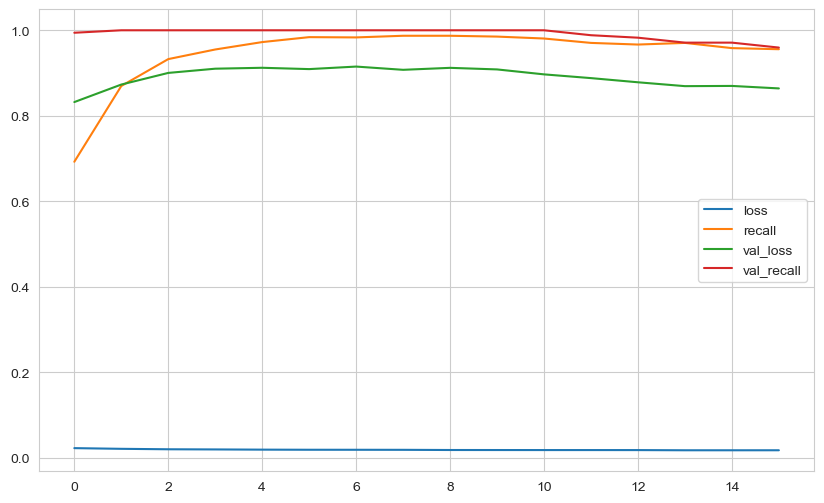

In [190]:
op_loss_df.plot()
plt.show() 
# Shows that the model is performing well on the training set, but not on the validation set.
# This indicates that the model is overfitting the training data.

In [191]:
loss, Recall = op_model.evaluate(X_test_Transformed, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", Recall)
# When we look at the recal training, validation and testing scores, we could asy this is a good result
# and indicating that the model is able to learn the patterns in the training data and generalize them to new data. 
# But When we look at the loss training, validation and testing scores, we could say that the model is underfitting the training data.

loss:  0.8281943202018738
recall:  0.9967319965362549


In [192]:
y_pred = (op_model.predict(X_test_Transformed) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

47/47 [==============================] - 0s 2ms/step
[[   9 1185]
 [   1  305]]
              precision    recall  f1-score   support

           0       0.90      0.01      0.01      1194
           1       0.20      1.00      0.34       306

    accuracy                           0.21      1500
   macro avg       0.55      0.50      0.18      1500
weighted avg       0.76      0.21      0.08      1500



47/47 [==============================] - 0s 2ms/step


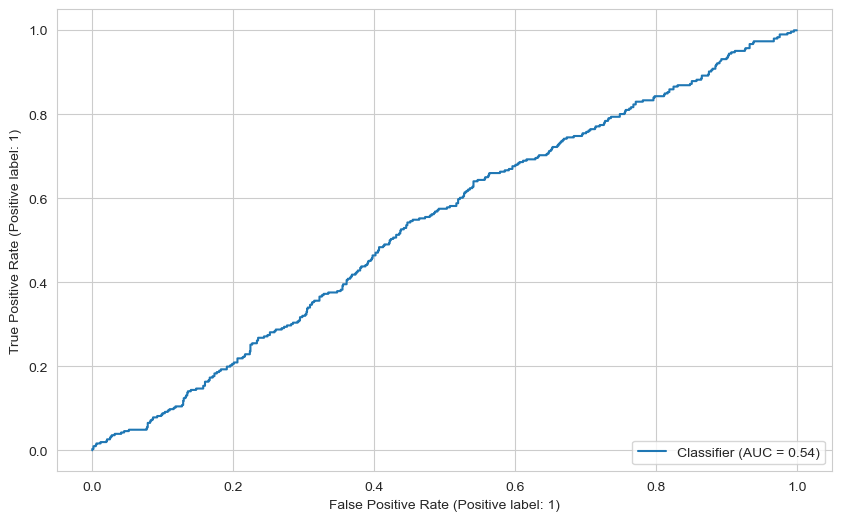

In [193]:
y_pred_proba = op_model.predict(X_test_Transformed)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [194]:
roc_auc_score(y_test, y_pred_proba)

0.5383932188173985

## As a conclusion 


**Regarding the overfitting problem we suggest:**

1-  Increasing the training data by decreasing the X_test size and X_val size.

2- Simplify the model architecture by decreasing the number of layers or the number of neurons in each layer.

3- Use regularization techniques such as dropout.

4- Use early stopping.


**Regarding Optuna we suggest change hyperparameter space to get better result.**

# Final Model and Model Deployment

In [195]:
import pickle
# To save a pipeline using pickle
pickle.dump(pipeline, open("Assignment1pipeline", "wb"))
# Savving the best model
op_model.save("Assignment1model.h5")

C:\Users\yahya\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Prediction

In [196]:
from tensorflow.keras.models import load_model
# Loading the model and pipeline
Final_model = load_model("Assignment1model.h5")
Final_pipeline = pickle.load(open("Assignment1pipeline", "rb"))

In [208]:
one_sample = df.drop("Exited", axis=1).iloc[2:3, :] # We pickup the second row of the data
one_sample

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
2,502,France,Female,42,8,159660.800,3,1,0,113931.570


In [209]:
one_sample_Transformed = Final_pipeline.transform(one_sample) # We apply the pipeline to preprocess it
one_sample_Transformed

array([[ 0.98933788, -0.57342575, -0.57302323,  1.08518476, -1.08518476,
        -1.53158942,  0.29181682,  1.04161176,  1.3299681 ,  2.51174059,
         0.63960869, -1.03593954,  0.24002762]])

In [210]:
(Final_model.predict(one_sample_Transformed) > 0.5).astype("int32") # We get the prediction

1/1 [==============================] - 0s 31ms/step


array([[1]])

In [211]:
df["Exited"].iloc[2] # We get the prediction # We observe the actual value and the predicted are the same

1

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___